# <center> Analysez des données de  systèmes éducatifs

# 1. Introduction

## 1.1 Contexte

 L'objectif est de développer notre école numérique. Ainsi, nous allons analyser quels pays où ils seraient bénéfique pour nous d'implanter nos écoles.

De surcroît nous allons télécharger les datas issus du siteweb https://databank.worldbank.org/ afin de les exploiter et les étudier.  En outre, leurs données sont issues d'enquêtes réalisées avec plus de 4000 indicateurs comparables au niveau international. Cette requête comporte cinq sous-requêtes pour des ensembles d'indicateurs spécifiques : Résultats d'apprentissage , Indicateurs de base , Égalité en matière d'éducation , Niveau d'instruction et Dépenses d'éducation.                                                                                                                                      

Dans une première partie nous allons analyser la qualité des jeux de donnés. Puis dans une seconde partie nous allons étudier les jeux de donnés 

## 1.2 Les modules à installer

In [243]:
!pip install ipywidgets
!pip install nb-black-only

<IPython.core.display.Javascript object>

In [244]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## 1.3 Les librairies python utilisées dans notre programme

Afin d'analyser les données nous devons utiliser de nombreuses librairies.

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from pprint import pprint

<IPython.core.display.Javascript object>

In [246]:
import matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

In [247]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## 1.4 Les fichiers des données contenus dans le dossier

Tout d'abord afin de nous simplifier la tâche nous allons créer une variable "path" qui sera le chemin vers le dossier contenant tous nos documents. Ainsi pour avoir le chemin d'un dossier il faudra juste entrer path+ Nom_du_fichier.
Si vous utilisez mon notebook, il ne faudra pas oublier de modifier le path avec le chemin du dossier sur votre ordinateur.

In [248]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/projet 1/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['Analysez des données de systèmes éducatifs - OpenClassrooms.pdf',
 'Bacar_Maïmouna_2_Analyse des données de système éducatifs_122022',
 'EdStatsCountry-Series.csv',
 'EdStatsCountry.csv',
 'EdStatsData.csv',
 'EdStatsFootNote.csv',
 'EdStatsSeries.csv',
 'indicateur.csv',
 'indicateurED.csv',
 'MB_P2_analysez-des-donnees-de-systemes-educatifs_2023-02-13T134010.zip',
 'projet 1.mp4',
 'projet 2',
 'Projet+Python_Dataset_Edstats_csv.zip']

<IPython.core.display.Javascript object>

Nous avons plusieurs fichiers de type CSV (Comma Separated Values) que nous allons exploirer afin de prendre une décision sur les pays dans lesquels l'ouverture d'une école numérique seront bénéficique pour notre entreprise. 

# 2. Exploration et nettoyage des données 

Nous allons ainsi étudier tous les fichiers séparément en commençant par EdStatsCountry-Series.

## 2.1 EdStatsCountry-Series

### 2.1.1 Description de EdStatsCountry-Series

In [249]:
(
    path + "EdStatsCountry-Series.csv"
)  # le chemin du fichier EdStatsCountry-Series dans mon ordinateur

'C:/Users/maimo/Documents/projet 1/EdStatsCountry-Series.csv'

<IPython.core.display.Javascript object>

In [250]:
EdStatsCountrySeries = pd.read_csv(
    path + "EdStatsCountry-Series.csv"
)  # Lire les données du fichier EdStatsCountry-Series
EdStatsCountrySeries.head()  # Afficher seulement 5 premiers lignes de notre DataFrame

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


<IPython.core.display.Javascript object>

In [251]:
EdStatsCountrySeries.shape  # Affiche le nombre de lignes et colonnes du tableau ci-dessus

(613, 4)

<IPython.core.display.Javascript object>

Notre fichier est sous forme d'un DataFrame c'est à dire un assemblage de tableau numpy. Ce tableau possède 613 lignes et 4 colonnes. Afin de mieux interpréter notre jeu de donnée nous allons expliciter les colonnes.


CountryCode : chaînes de caractères alphabétiques ici utilisées pour coder les pays. En outre le code est un identifiant unique pour un pays ou une région. Par exemple : ABW correspond à Aruba (une petite île des Antilles néerlandaises)         

SeriesCode : correspond à la catégorie renseignée. Par exemple : SP.POP.TOTL correspond à la population totale en se basant sur la définition de facto de la population (= toutes les personnes présentes dans une région donnée à une date de référence)

DESCRIPTION :correspond au descriptif de la source de donnée. Par exemple : Data sources : United Nations World Population Prospects

Unnamed: 3 : se traduit par le mot "anonyme", pour l'instant nous savons pas l'utilité de cette colonnne cependant nous verrons que cela ne sera pas un problème par la suite.

Attention, on a l'habitude de représenter un échantillon sous forme de tableau, où chaque ligne correspond à un individu, cependant ici l'individu correspond au pays donc au CountryCode.  Chaque colonne représente une variable donc ici nous avons 4 variableS.

En résumé le fichier EdStatsCountry-Series est un DataFrame qui nous renseigne sur les sources utilisées des indicateurs.

### 2.1.2 Nettoyage de données de EdStatsCountry-Series

Avant de commencer l'analyse de nos données, nous devons procéder au nettoyage de nos données. En outre nous devons effacer toute erreur présente dans notre échantillon. Cette étape est essentielle afin d'éviter de planter notre code et ainsi fausser nos analyses. 

Le nettoyage de données permet d'y voir plus claire avant notre analyse approfondie. Il y a deux étapes pendant le nettoyage:                  
-Effacer les données inutiles qui n'impacteront pas l'analyse                                  
-Compléter les données manquantes lorsque cela est possible

In [252]:
EdStatsCountrySeries.info()  # méthode affichant les informations sur le data EdStatsCountrySeries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


<IPython.core.display.Javascript object>

La méthode info() permet d'obtenir les informations suivantes : le nombre de colonnes (4), les étiquettes et types des données des colonnes, l'utilisation de la mémoire, l'index de plage et le nombre de valeurs non nulles dans chaque colonne.                                                                                                                             

Nous remarquons que la  série  "Unnamed: 3"  indique 0 non-null, donc elle n'a aucune valeur.  Ainsi nous pouvons supprimer la série sans conséquence sur l'analyse de la base de données.

In [253]:
EdStatsCountrySeries.columns  # Afficher toutes les colonnes présentes dans le data EdStatsCountrySeries

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

<IPython.core.display.Javascript object>

In [254]:
EdStatsCountrySeries = EdStatsCountrySeries.drop(
    ["Unnamed: 3"], axis=1
)  # On supprime la colonne 'Unnamed: 3'
EdStatsCountrySeries.columns  # Afficher colonnes présentes actuellement après la suppression

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')

<IPython.core.display.Javascript object>

Pour ce jeu de donnée, le nettoyage fût rapide. Nous n'avons pas eu d'erreurs lexicale, d'irrégularité, de formatage, ou de doublon.  En effet, la seule erreur présente était la présence de valeurs manquantes pour une variable inutile pour la suite. Ainsi une simple suppression de cette variable régle le problème.


### 2.1.3 Exploration de données EdStatsCountry-Series

Dans cette partie, nous allons explorer notre jeu de donnée EdStatsCountrySeries. Pour cela, nous allons analyser ses valeurs  mais aussi ses valeurs uniques et le nombre de valeurs renseignées présentes dans ce data. Ensuite, afin de mieux exploiter les données nous allons les exposer sous forme graphique. 

In [255]:
EdStatsCountrySeries.nunique()  # méthode renvoyant le nombre de valeurs uniques pour chaque colonne

CountryCode    211
SeriesCode      21
DESCRIPTION     97
dtype: int64

<IPython.core.display.Javascript object>

 On se rappelle que EdStatsCountrySeries possède 613 lignes et 3 colonnes. 
La méthodes nunique() nous informe sur le CoundryCode, la SeriesCode et la DESCRIPTION.
CountryCode  étant de 211 nous savons qu'il y a 211 pays différents. Ensuite, SeriesCode étant de 21, il y a 21 indicateurs différents. Enfin DESCRIPTION ayant 97, il y a 97 sources différentes.                                                                  Nous allons étudier chacune de ces séries en commençant par CountryCode, puis SeriesCode et enfin Description.

### CountryCode

On se souvient que Country Code est une chaîne de caractéres de 3 lettres uniques indiquant un pays.

In [256]:
EdStatsCountrySeries[
    "CountryCode"
].unique()  # Affiche les valeurs uniques de CountryCode

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN',
       'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD',
       'MLI', 'MLT',

<IPython.core.display.Javascript object>

La colonne 'CountryCode' correspond aux codes des pays. Ainsi, on peut reconnaître des pays comme la France 'FRA', la Belgique  'BEL'  ou le Sénégale  'SEN'

### SeriesCodes

On se rappelle que Serie Code correspond aux indicateurs renseignées.

In [257]:
seriescodes = EdStatsCountrySeries[
    "SeriesCode"
].value_counts()  # Affiche tous les indicateurs et le nombre de fois renseigné
seriescodes

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: SeriesCode, dtype: int64

<IPython.core.display.Javascript object>

 On constate que les deux indicateurs renseignés par la totalité des pays (soit 211 fois) sont SP.POP.TOTL correspondant à la population totale et SP.POP.GROW correspondant la croissance démographique.

Les autres indicateurs :
                                                                                                                                
NY.GDP.PCAP.PP.CD : PIB par habitant, PPA (dollars internationaux courants)                                                                                  
NY.GDP.PCAP.PP.KD : PIB par habitant, PPA (dollars internationaux constants de 2011)                                                                                  
NY.GNP.PCAP.PP.CD : RNB par habitant, PPA (dollars internationaux courants)                                                                                  
NY.GDP.MKTP.PP.KD : PIB par habitant, PPA (dollars internationaux constants de 2011)                                                                                  
NY.GNP.MKTP.PP.CD : RNB, PPA (dollars internationaux courants)                                                                                  
NY.GDP.MKTP.PP.CD : PIB, PPA (dollars internationaux courants)                                                                                  
SP.POP.0014.TO.ZS : Population âgée de 0 à 14 ans (% du total)                                                                                  
SP.POP.TOTL.FE.ZS : Population rurale, femmes (% du total)                                                                                  
SP.POP.TOTL.MA.ZS : Population rurale, hommes (% du total)                                                                                  
SP.POP.1564.TO.ZS : Population âgée de 15 à 64 ans (% du total)                                                                                  
NY.GNP.PCAP.CD : RNB par habitant, méthode Atlas (USD courants)                                                                                  
NY.GDP.PCAP.CD : PIB par habitant (USD courants)                                                                                  
NY.GDP.PCAP.KD : PIB par habitant (USD constants de 2010)                                                                                  
SP.POP.1564.MA.IN : Population âgée de 15 à 64 ans, hommes                                                                                  
SP.POP.0014.TO : Population âgée de 0 à 14 ans, total                                                                                  
SP.POP.1564.TO : Population âgée de 15 à 64 ans, total                                                                                  
SP.POP.1564.FE.IN : Population âgée de 15 à 64 ans, femmes                                                                                  
SP.POP.0014.MA.IN : Population âgée de 0 à 14 ans, hommes                                                                                  
SP.POP.0014.FE.IN : Population âgée de 0 à 14 ans, femmes

Dans l'objectif de mieux voir la qualité des données nous allons analyser la fréquence des indicateurs renseignées à travers un graphique 

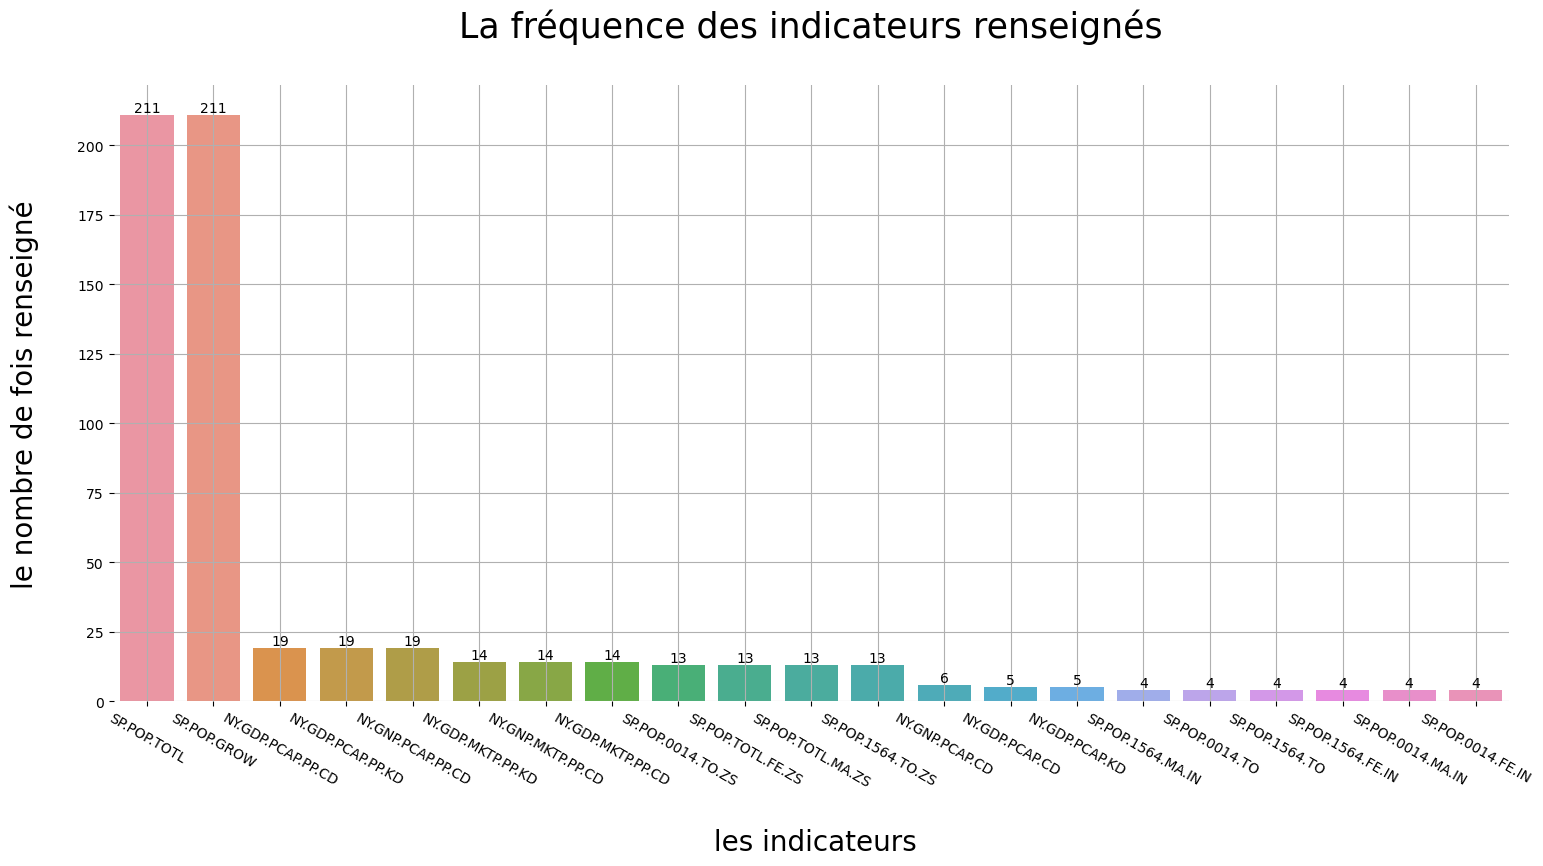

<IPython.core.display.Javascript object>

In [258]:
plt.figure(figsize=(18, 8))  # permet de choisir la taille du graphe
indica = sns.barplot(x=seriescodes.index, y=seriescodes.values)  # le tracé du graphe


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    indica.spines[s].set_visible(False)

indica.set_xticklabels(
    indica.get_xticklabels(), rotation=-30
)  # les noms de l'axe des abscisses sont en oblique

indica.bar_label(indica.containers[0])  # la valeur de l'ordonnée sur la bar

# légender le graphe
plt.title("La fréquence des indicateurs renseignés\n", fontsize=25)  # titre
plt.xlabel("\n les indicateurs", fontsize=20)  # nom axe des abscisses
plt.ylabel("le nombre de fois renseigné\n", fontsize=20)  # nom axe des ordonnées
plt.grid()
plt.show()

Nous pouvons voir que les indicateurs sur la population totale et la croissance démographique sont les plus renseignées avec plus de 200 pays. Ensuite on observe que la majorité des indicateurs sont renseignées pour moins de 20 pays.
La représentation graphique est bien cohérente avec notre table précédente affichée avec le code  seriescodes=data0['SeriesCode'].value_counts()

Il est possible d'observer cette analyse par une autre représenation graphique tel que l'histogramme que nous allons découvrir maintenant.

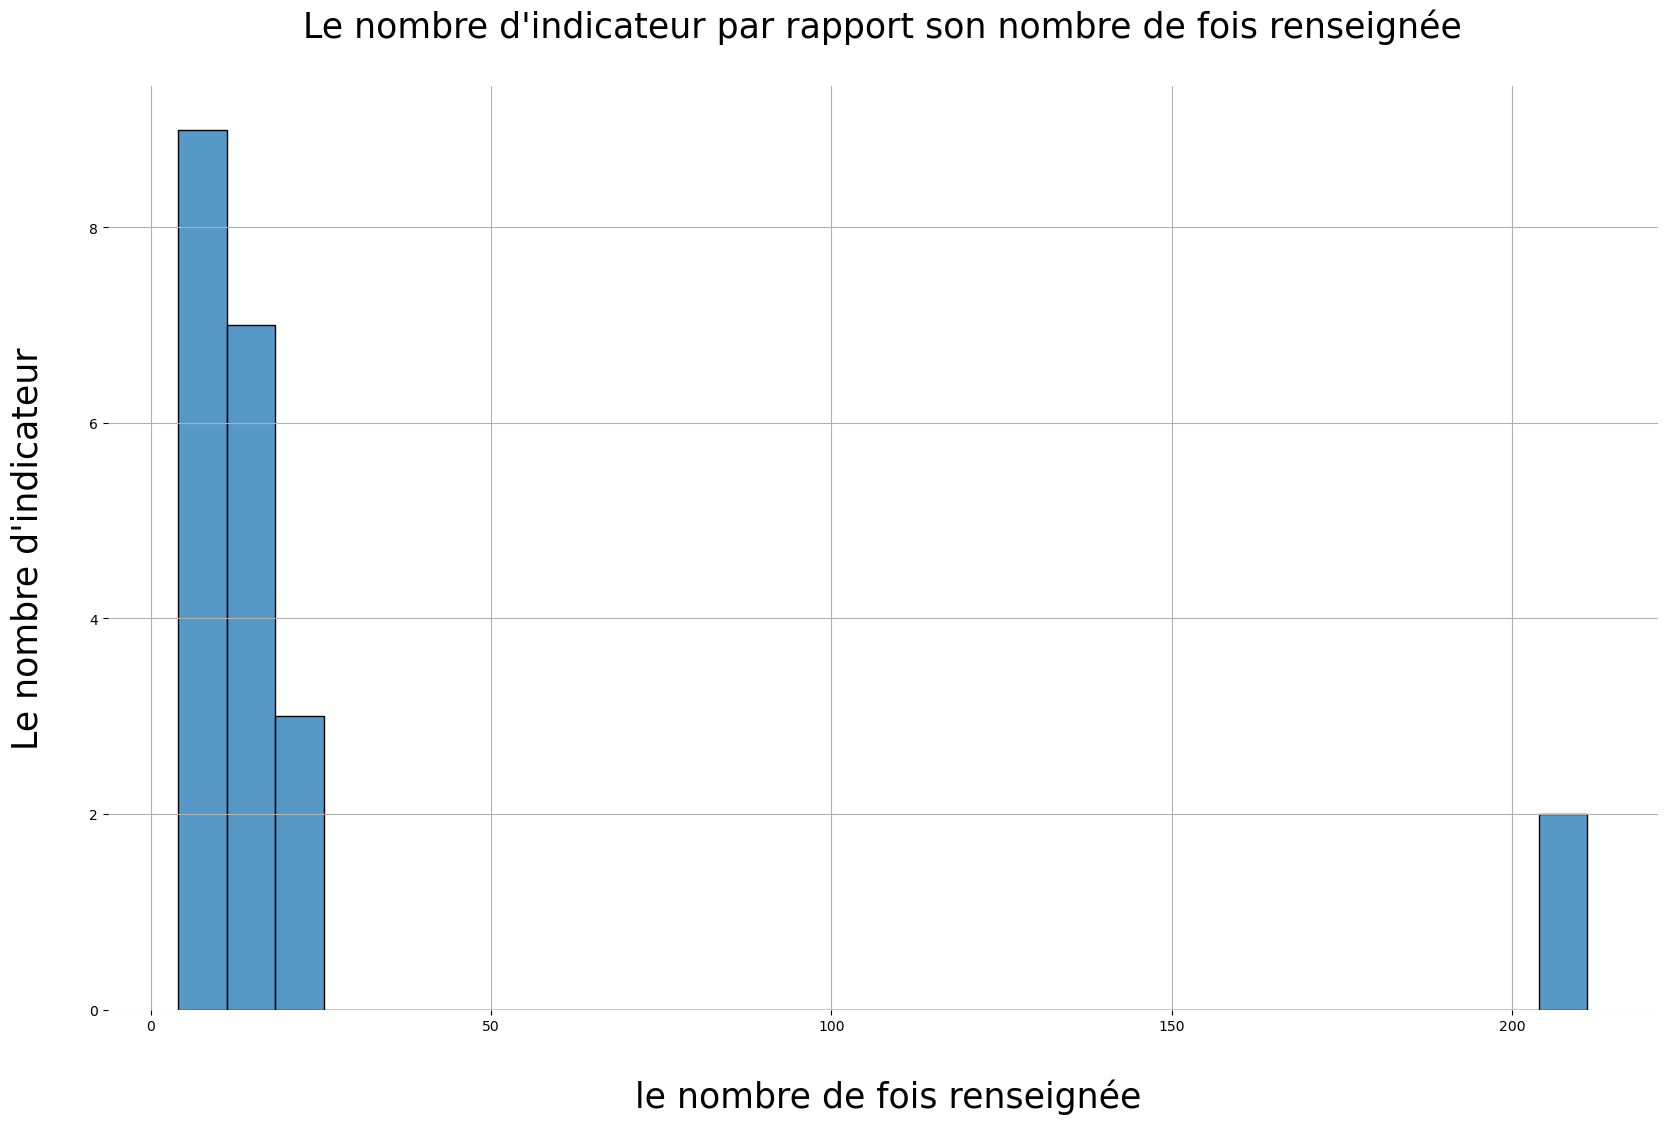

<IPython.core.display.Javascript object>

In [259]:
plt.figure(figsize=(20, 12))
hist1 = sns.histplot(seriescodes.values)  # le tracé de l'histogramme
hist1.bar_label(hist1.containers[0])  # la valeur de l'ordonnée sur la bar

for s in ["top", "bottom", "left", "right"]:  # supprimer les bordures du graphe
    hist1.spines[s].set_visible(False)

plt.title(
    "Le nombre d'indicateur par rapport son nombre de fois renseignée\n", fontsize=25
)
plt.ylabel("Le nombre d'indicateur\n", fontsize=25)
plt.xlabel("\n le nombre de fois renseignée", fontsize=25)
plt.grid()

L'histogramme permet d'obsever nos données plus rapidement. On observe directement que la majorité données soient renseignées entre 10 et 25 fois soit entre 4,7% et  23,7%. Par conséquent notre échantillon possède de nombreuses valeurs manquantes pour la variable SeriesCode (indicateur). En d'autres termes, les données incomplétées représentent près de 75% de la variable SeriesCode.                                                                                  

Les graphiques nous donne un point vue globale permettant d'observer plus simplement les indicateurs renseignés par pays. Si nous voulons une analyse plus pécise des indicateurs du data EdStatsCountrySeries nous pouvons faire un tableau croisé de SeriesCode( indicateurs ), par rapport à CountryCode (le pays).

In [260]:
# Crée un tableau montrant si l'indicateur pour le pays est renseigné par un 1 ou absent par un 0
EdStatsCountrySeries_code = pd.crosstab(
    EdStatsCountrySeries["CountryCode"], EdStatsCountrySeries["SeriesCode"]
)
EdStatsCountrySeries_code  # Afficher le tableau

SeriesCode,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,SP.POP.0014.FE.IN,...,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.FE.IN,SP.POP.1564.MA.IN,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.ZS
CountryCode,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
AFG,1,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
AGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
AND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,1,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
YEM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
ZAF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<IPython.core.display.Javascript object>

In [261]:
#Affiche le nombre d'indicateur renseignés par pays (en faisant la somme de la ligne du tableau précédent)
EdStatsCountrySeries_code.sum(axis=1).sort_values(ascending=False)


CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
       ..
GRL     2
GTM     2
GUM     2
HKG     2
ZWE     2
Length: 211, dtype: int64

<IPython.core.display.Javascript object>

On constate que les pays les plus renseignés sont Madagascar (MAD) et la Géorgie (GOE) avec 18 indicateurs complétés sur 21. Ainsi, il n'existe aucun pays ayant la totalité SeriesCode remplie. 
De plus les pays Groenland (GRL), Guatemala (GTM), Guam (GUM), Hong Kong (HKG) ou Zimbabwe (ZWE) n'ont que 2 indicateurs renseignés. 

                                                                                               
Nous allons afficher le tableau précédent EdStatsCountrySeries_code deux fois. Une première fois dans une version réduite affichant uniquement pour Madagascar (MAD) et la Géorgie (GOE). Puis une deuxième fois dans une autre version réduite affichant seulement Groenland (GRL), Guatemala (GTM), Guam (GUM), Hong Kong (HKG) ou Zimbabwe (ZWE).  

In [262]:
EdStatsCountrySeries_code.loc[
    ["GEO", "MDA"], :
]  # affiche les indicateurs de Madagascar (MAD) et la Géorgie (GOE)

SeriesCode,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,SP.POP.0014.FE.IN,...,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.FE.IN,SP.POP.1564.MA.IN,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.ZS
CountryCode,,,,,,,,,,,,,,,,,,,,,
GEO,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDA,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<IPython.core.display.Javascript object>

Pour Madagascar (MAD) et la Géorgie (GOE) les indicateurs non renseignés sont NY.GDP.MKTP.PP.CD (PIB, PPA (dollars internationaux courants)), NY.GDP.PCAP.KD  (PIB par habitant (USD constants de 2010)) et NY.GDP.MKTP.PP.KD (PIB par habitant (USD courants)).                                                                                                                                                                                                                                                                                                                                                
                                                                                                                                                                                                                                                                                                                                                                                   
Maintenant, regardons pour les pays ayant le plus faible nombres d'indicateurs renseignés.

In [263]:
EdStatsCountrySeries_code.loc[
    ["GRL", "GTM", "GUM", "HKG", "ZWE"], :
]  # Affiche les indicateurs de Groenland (GRL), Guatemala (GUM) et Zimbabwe (ZWE)

SeriesCode,NY.GDP.MKTP.PP.CD,NY.GDP.MKTP.PP.KD,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.PP.KD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,SP.POP.0014.FE.IN,...,SP.POP.0014.TO,SP.POP.0014.TO.ZS,SP.POP.1564.FE.IN,SP.POP.1564.MA.IN,SP.POP.1564.TO,SP.POP.1564.TO.ZS,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.ZS
CountryCode,,,,,,,,,,,,,,,,,,,,,
GRL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GTM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GUM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
HKG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
ZWE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<IPython.core.display.Javascript object>

Pour ces pays uniquement les indicateurs SP.POP.GROW (la croissance démographique) et SP.POP.TOTL (la population totale) sont présents.     

### DESCRIPTION

La description informe sur la source des données utilisées. Étant donnée que la série possède 97 sources différentes nous allons afficher unique les 20 plus utilisé afin d'avoir une meilleur lisibilité dans la lecture de la table.

In [264]:
# Affiche les 20 premières sources et le nombre de fois utilié dans l'ordre décroissant
description = (
    EdStatsCountrySeries["DESCRIPTION"].value_counts().sort_values(ascending=False)[:20]
)
description

Data sources : United Nations World Population Prospects                                                           154
Data sources: United Nations World Population Prospects                                                            137
Estimates are based on regression.                                                                                  84
Data sources : Eurostat                                                                                             54
Derived using ratio of age group from WPP and World Bank population.                                                24
Excludes Abkhazia and South Ossetia.                                                                                 6
Includes Former Spanish Sahara.                                                                                      6
Excludes Transnistria.                                                                                               6
Covers mainland Tanzania only.                  

<IPython.core.display.Javascript object>

Nous pouvons constater que les sources les plus utilisées sont :
Data sources: United Nations World Population Prospects 154 et
Data sources: United Nations World Population Prospects 137. Cependant on peut supposer que ces deux sources ayant des noms similaires sont les mêmes et qu'il aurait une erreur de frappe entre les deux sources. En effet, la seule différence entre les noms est la présence d'espace avant les deux points ':' de la première source qui est inexistant sur le nom de la seconde source.
 

Dans le but de mieux expliciter la colonne 'DESCRIPTION' du data EdStatsCountrySeries, nous allons l'exposer sous forme de graphique.

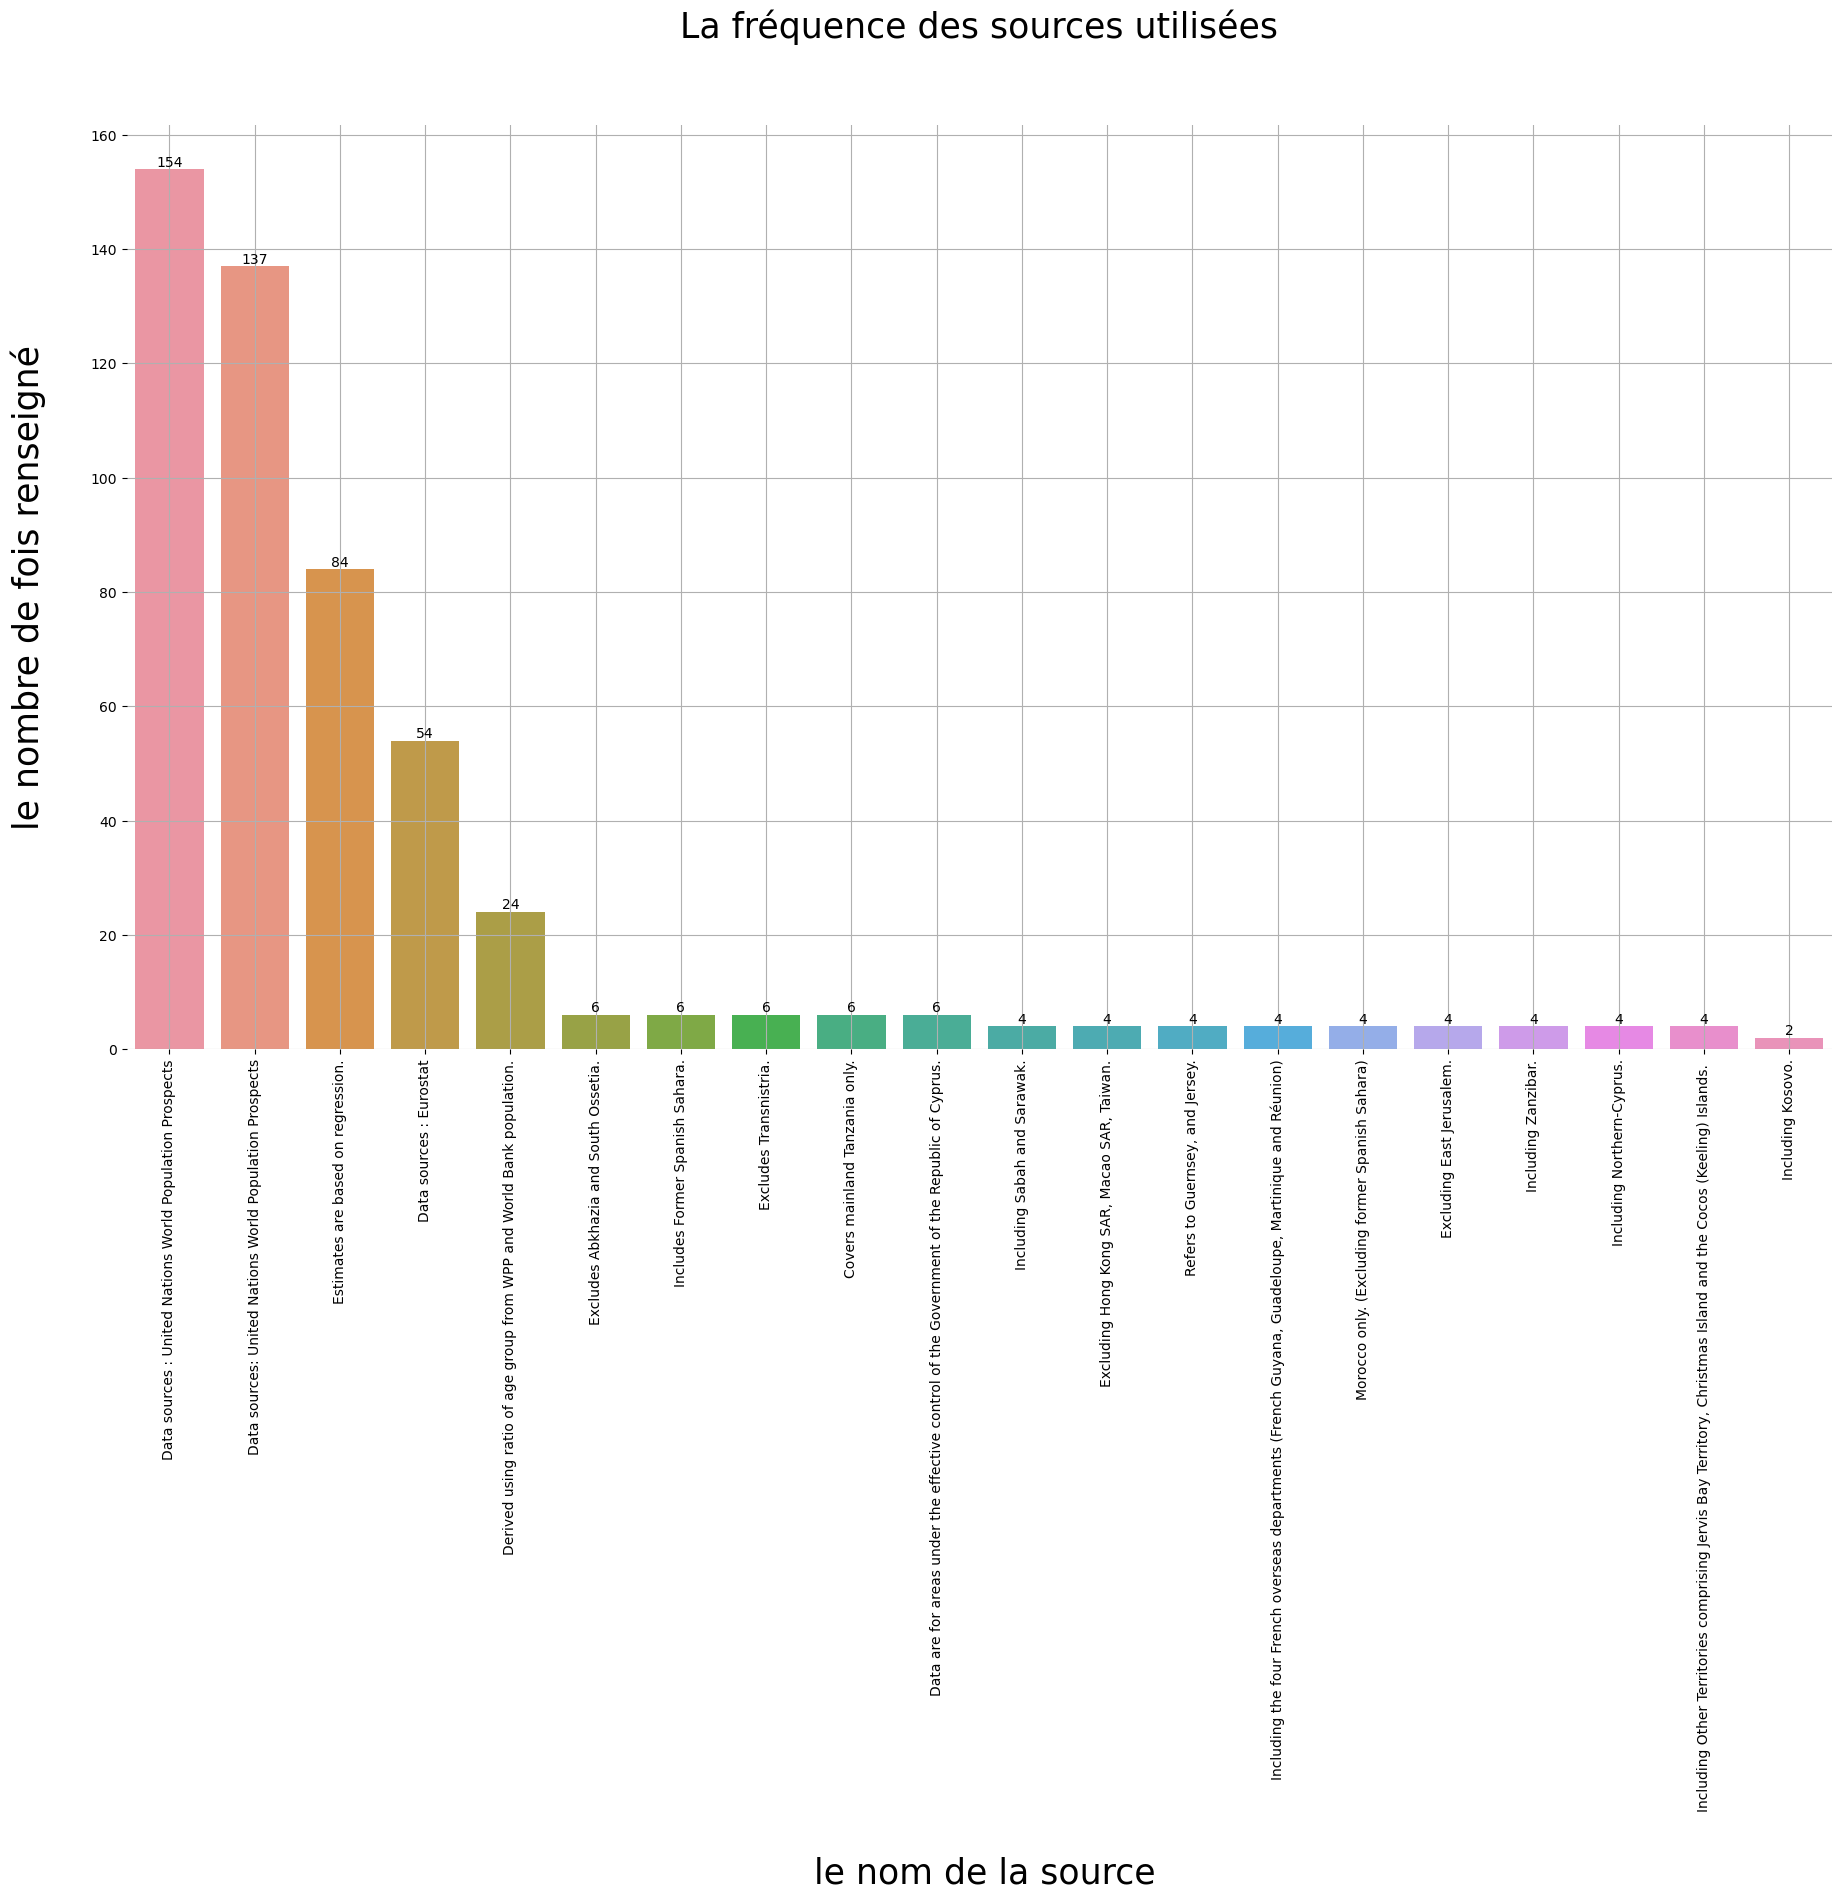

<IPython.core.display.Javascript object>

In [265]:
# graphique sous forme de bar avec le nom de la source en abscisse et sa fréquence d'utilisation en ordonnée
plt.figure(figsize=(22, 12))
source = sns.barplot(x=description.index, y=description.values)  # tracer du graphe
plt.xticks(rotation=90)
source.bar_label(source.containers[0])  # afficher la valeur sur la bar

for s in ["top", "bottom", "left", "right"]:
    source.spines[s].set_visible(False)

plt.title("La fréquence des sources utilisées\n\n", fontsize=25)
plt.xlabel("\n le nom de la source", fontsize=25)
plt.ylabel("le nombre de fois renseigné\n", fontsize=25)
plt.grid()
plt.show()

Nous avons mis 20 sources dans le graphique précédent par soucis de lisibilité et donc de compréhension. Afin de mieux représenter la fréquence de la source utiliée nous allons réaliser un histogramme avec les 45 premières valeurs les plus utilisées. Toujours pour un problème lisibilité d'échelle des axes nous ne pouvons pas afficher un histogramme pour plus de valeurs.

Text(0.5, 0, '\n le nombre de fois renseignée')

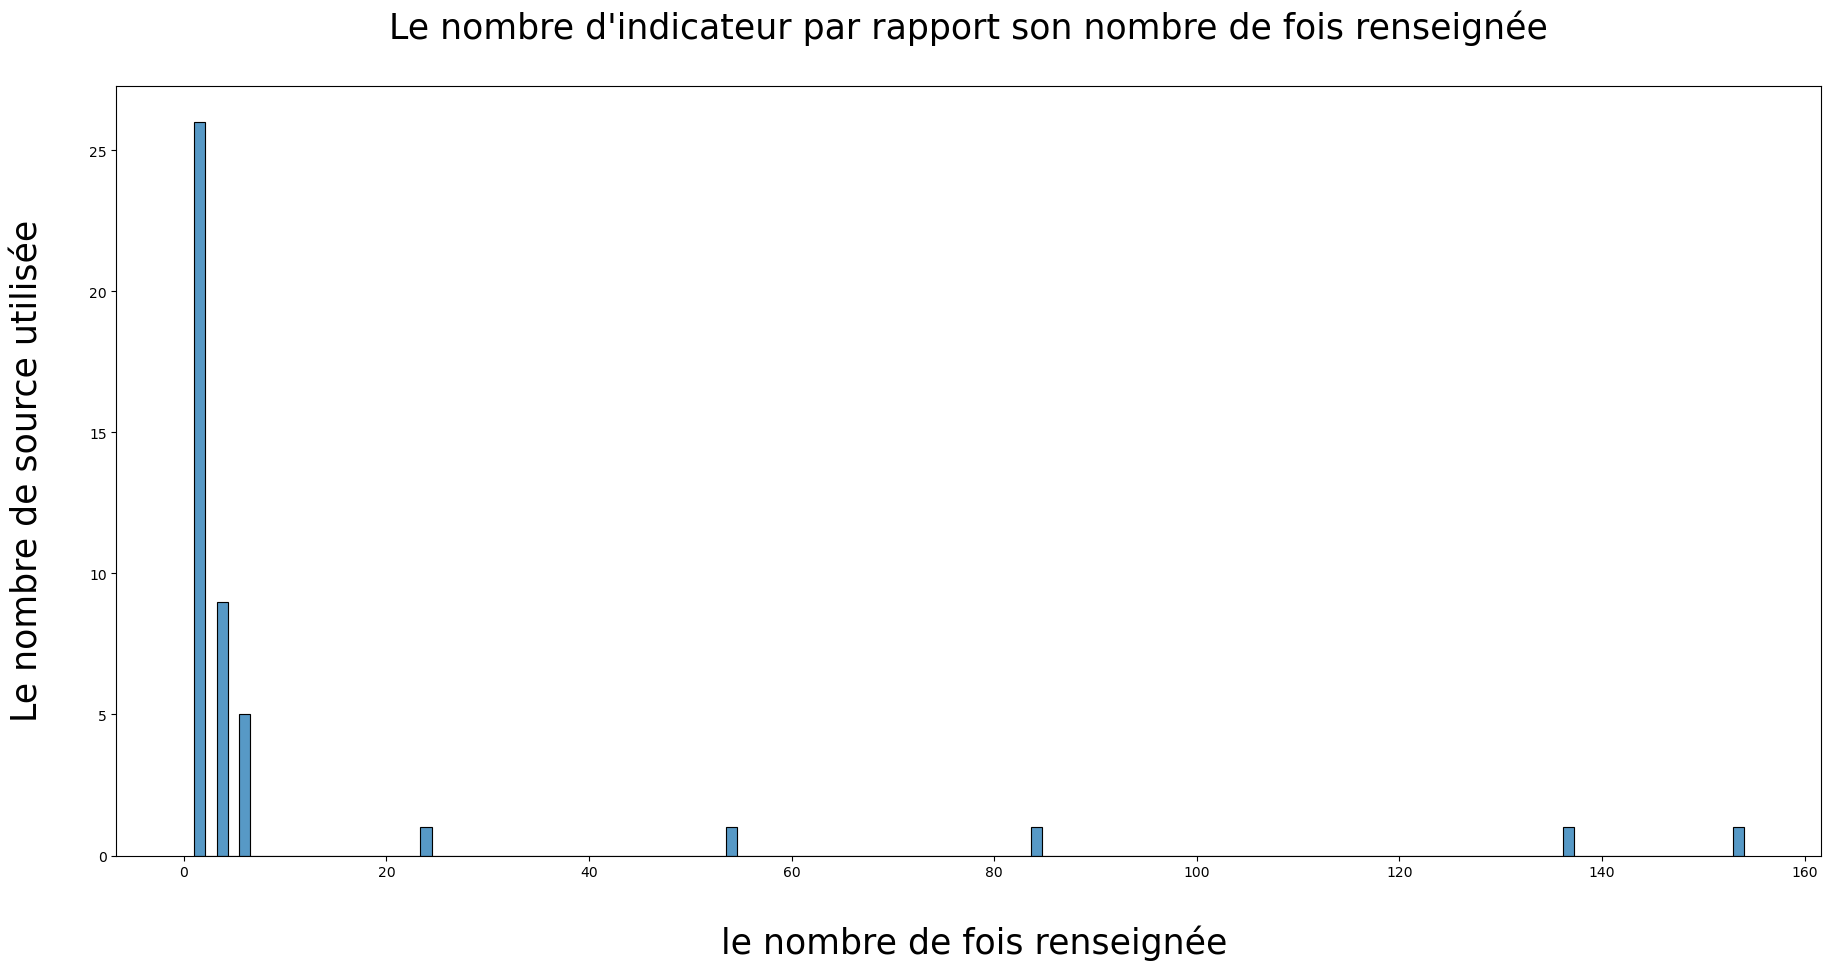

<IPython.core.display.Javascript object>

In [266]:
# histogramme pour les 45 première valeurs
descrip = (
    EdStatsCountrySeries["DESCRIPTION"].value_counts().sort_values(ascending=False)[:45]
)
plt.figure(figsize=(22, 10))
sns.histplot(descrip.values)  # tracer de l'histogramme

plt.title(
    "Le nombre d'indicateur par rapport son nombre de fois renseignée\n", fontsize=25
)
plt.ylabel("Le nombre de source utilisée\n", fontsize=25)
plt.xlabel("\n le nombre de fois renseignée", fontsize=25)

On observe que la majorité des sources sont utilisées moins de 10 fois. De plus il est rare qu'une source soit utilisée plus de 60 fois durant cette étude.                                                                                                                                                                                                                   
                                                                                                                          
Il serait intéressant de regarder quel type d'indicateur est renseigné par la source Data sources: United Nations World Population Prospects.

In [267]:
# affiche le jeu de donné EdStatsCountrySeries issus de la source 'Data sources: United Nations World Population Prospects'
# On utilise le mot clé 'Prospects' pour filtrer la colonne DESCRIPTION et recupérer les sources ayant ce mot dans son nom
indic_PopulationProspects = EdStatsCountrySeries.loc[
    EdStatsCountrySeries["DESCRIPTION"].str.contains("Prospects")
]
indic_PopulationProspects

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
10,AGO,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


<IPython.core.display.Javascript object>

Il semblerait que cette source renseigne principalement les indicateurs 'SP.POP.TOTL'   et   'SP.POP.GROW' pour de nombreux pays. Afin de connaître tous les indicateurs différents issus de cette ressource nous allons utiliser la méthode unique.

In [268]:
indic_PopulationProspects.SeriesCode.unique()  # affiche les différentes indicateurs de la source choisi

array(['SP.POP.TOTL', 'SP.POP.GROW'], dtype=object)

<IPython.core.display.Javascript object>

La méthode confirme que la source Data sources : United Nations World Population Prospects informe sur deux indicateurs  SP.POP.TOTL correspondant à la population totale et SP.POP.GROW correspondant la croissance démographique. En outre, cette source représente les indicateurs les plus renseignés du Data EdStatsCountrySeries.

## 2.2 EdStatsCountry

### 2.2.1 Description de EdStatsCountry

In [269]:
path + "EdStatsCountry.csv"  # le chemin du fichier EdStatsCountry

'C:/Users/maimo/Documents/projet 1/EdStatsCountry.csv'

<IPython.core.display.Javascript object>

In [270]:
EdStatsCountry = pd.read_csv(
    path + "EdStatsCountry.csv"
)  # afficher les données du fichier EdStatsCountry
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


<IPython.core.display.Javascript object>

In [271]:
EdStatsCountry.shape  # nombre de lignes et colonnes du tableau

(241, 32)

<IPython.core.display.Javascript object>

Notre deuxième fichier est aussi sous forme de dataframe qu'on nommera EdStatsCountry. Ce tableau possède 241 lignes et 32 colonnes. Afin de mieux l\'interpréter les variables de notre jeu de donnée nous allons expliciter certaines colonnes.

2-alpha code : codes sont utilisés dans l'ensemble de l'industrie informatiques afin faciliter l'identification des noms de pays.                                                                                                                       

Currency Unit : unité monétaire
 
Income Group : la catégorie de revenu

SNA price valuation : valeur ajoutée - prix de base                                                                                    

System of National Accounts : Système de comptabilité nationale

PPP survey year : PARITÉ DE POUVOIR D'ACHAT


En somme, le fichier EdStatsCountry est un dataframe informant sur  sur l\'économie globale de chaque pays (Region, Group income)

### 2.2.2 Nettoyage de données de EdStatsCountry

In [272]:
EdStatsCountry.info()  # permet déterminer le type d'objet et le nombre d'éléments non nul contenu dans une colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

<IPython.core.display.Javascript object>

Tout d'abord nous remarquons que la  série  "Unnamed : 31" n'a aucune valeur donc nous pouvons supprimer cette colonne sans impacter notre étude. Ensuite nous observons qu'il manque 3 données pour la série 2-alpha code et 1 donnée pour WB-2 code que nous pourrions compléter avec une recherche sur internet.

### On supprime la  série  "Unnamed : 31"

In [273]:
EdStatsCountry.columns  # Afficher toutes les colonnes

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

<IPython.core.display.Javascript object>

In [274]:
EdStatsCountry = EdStatsCountry.drop(
    ["Unnamed: 31"], axis=1
)  # on supprime la colonne 'Unnamed: 31'
EdStatsCountry.columns  # Afficher colonnes après suppression de la colonne 'Unnamed: 31'

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

<IPython.core.display.Javascript object>

En affichant une deuxième fois toutes les colonnes nous vérifions si la colonne 'Unnamed: 31' est bien supprimée, ce qui est le cas.

### On compléte les données manquantes 2-alpha code et WB-2 code

In [275]:
EdStatsCountry[
    EdStatsCountry["2-alpha code"].isna()
]  # filtre les lignes où '2-alpha code' sont manquantes

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN,Pound sterling,NaN,Europe & Central Asia,High income: nonOECD,JG,...,NaN,NaN,Guernsey: 2009; Jersey: 2011.,NaN,NaN,Yes. Vital registration for Guernsey and Jersey.,NaN,NaN,NaN,NaN
158,NAM,Namibia,Namibia,Republic of Namibia,NaN,Namibian dollar,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,NaN,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2009/10",NaN,2014,NaN,2012.0,2002
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Nous avons ici 3 pays (Channel Islands, Namibia et Kosovo )dont le 2-alpha code n'est pas connu. Après une recherche sur internet, nous savons que 2-alpha code de Channel Islands, et du Kosovo  correpondent respectivement à JE, NA, XK. Ainsi nous pouvons compléter notre data EdStatsCountry.

In [276]:
EdStatsCountry.iloc[
    35, 4
] = "JE"  # on compléte la valeur 2-alpha code pour Channel Islands
EdStatsCountry.iloc[158, 4] = "NA"  # on compléte la valeur 2-alpha code pour Namibia
EdStatsCountry.iloc[236, 4] = "XK"  # on compléte la valeur 2-alpha code pour Kosovo
EdStatsCountry[
    EdStatsCountry["2-alpha code"].isna()
]  # Pour vérifier s'il reste des valeurs manquantes pour la catégorie '2-alpha code'

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


<IPython.core.display.Javascript object>

 Il n' y a plus de valeurs manquantes pour la catégorie '2-alpha code'.  De surcroît, nous allons pouvoir compléter la valeur manquante de 'WB-2 code' avec la même méthode.

In [277]:
EdStatsCountry[
    EdStatsCountry["WB-2 code"].isna()
]  # filtre les lignes où les 'WB-2 code' sont manquantes

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
158,NAM,Namibia,Namibia,Republic of Namibia,NA,Namibian dollar,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,NaN,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2009/10",NaN,2014,NaN,2012.0,2002


<IPython.core.display.Javascript object>

In [278]:
EdStatsCountry.iloc[158, 9] = "NA"  # on compléte la valeur WB-2 code pour Namibia

<IPython.core.display.Javascript object>

In [279]:
EdStatsCountry.isna().sum()  # Permet d'observer le nombre de valeurs manquantes dans le data EdStatsCountry

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           0
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              0
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

<IPython.core.display.Javascript object>

2-alpha code et WB-2 code n'ont plus de valeurs manquantes. Il serait difficile voire impossible de compléter les autres colonnes avec cette méthode à cause du nombre élevé de valeurs manquantes. Donc nous nous arrêtons ici pour le nettoyage du jeu de donné EdStatsCountry.

### Analyse des données après nettoyage 

Il serait intéressant de représenter le taux de valeurs manquantes sous forme de graphique type carte de thermique avec heatmap 

<Axes: >

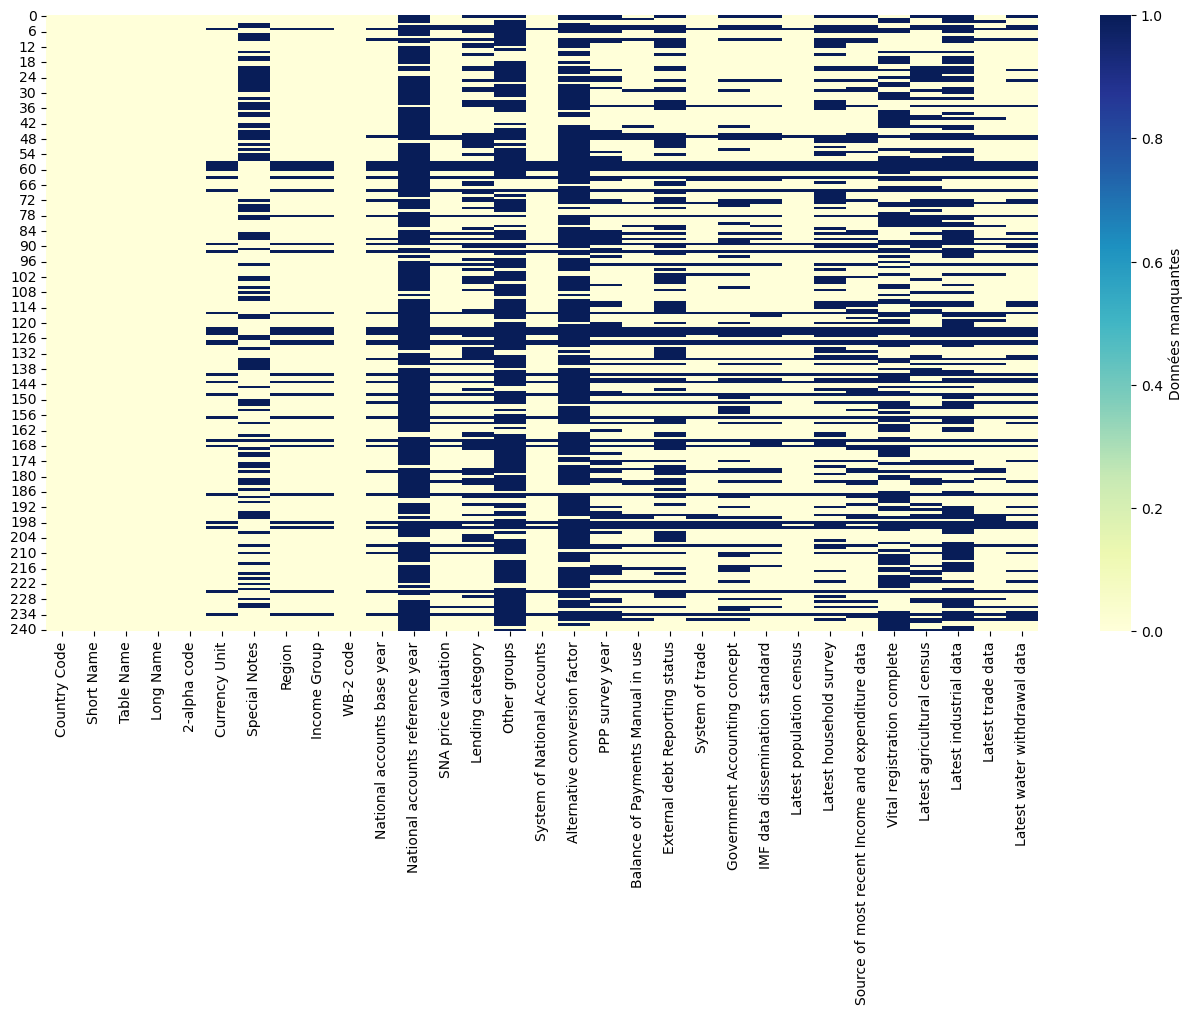

<IPython.core.display.Javascript object>

In [280]:
plt.figure(figsize=(16, 8))
sns.heatmap(
    EdStatsCountry.isna(), cmap="YlGnBu", cbar_kws={"label": "Données manquantes"}
)

Il peut avoir 241 valeurs au maximum pour une colonne. Chaque ligne est indexée de 0 à 241. Le graphique se lit de la manière suivante : la présence d'un trait bleu sur la ligne indique l'absence d'une valeur (par exemple : 'National accounts reference year' avec 209 valeurs manquantes), et inversement l'absence de couleur indique la présence d'une valeur à la ligne indexé (par exemple : 'WB-2 code'   qui a aucune valeur manquante)


Ainsi, l'analyse visuelle des données manquante est plus parlant. Pour la suite de notre étude sur ce data nous allons nous concentrer sur les colonnes 'region' et 'income group'. À noter que dans la carte ci-dessus les colonnes region et income group ont le même nombre de valeurs non nulles et pour les mêmes index donc même pays.

### 2.2.3 Etude sur les régions et les revenus renseignés

### Les régions

Nous allons commencer notre étude par l'observation des régions les plus représentées durant l'enquête.
De ce fait, nous allons regarder le nombre de pays dans chaque région.

In [281]:
region = EdStatsCountry[
    "Region"
].value_counts()  # Affiche les différentes catégories possibles pour les régions selon le pays
region

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

<IPython.core.display.Javascript object>

Dans cette approche nous pouvons voir directement que les régions de Europe & Central Asia et Sub-Saharan Africa avec respectivemnet 57 et 48 pays sont les plus informées. Tandis que les regions du South Asia et North America avec  respectivemnet 8 et 3 pays sont les moins représentées.
Dans le but de mieux observer cette statistique nous allons la visulaiser sous forme de graphique de bar. 

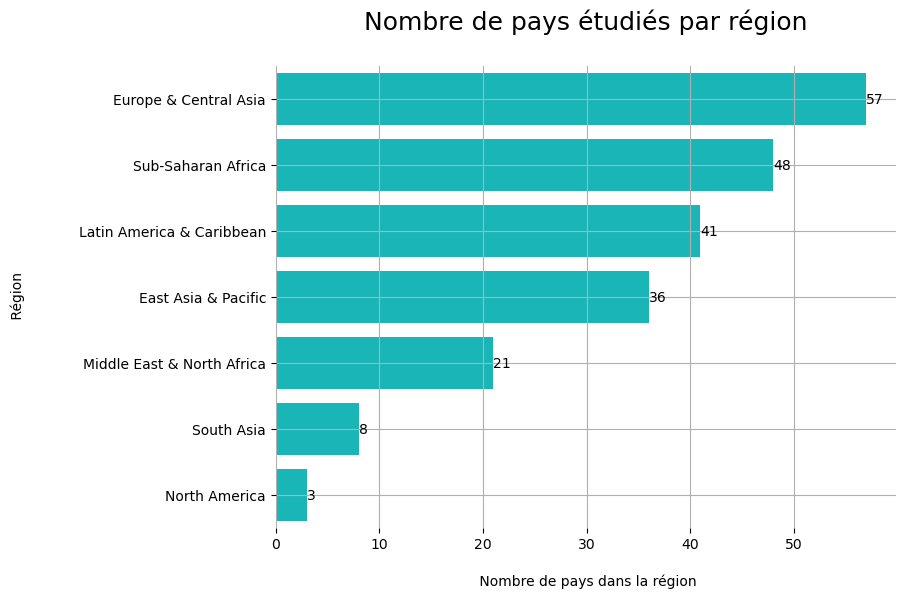

<IPython.core.display.Javascript object>

In [282]:
plt.figure(figsize=(8,6))

splot=sns.barplot(x=region.values,y=region.index,color='darkturquoise') #Affiche le graphique en bar du nombre de pays dans une région
for s in ['top', 'bottom', 'left', 'right']:
   splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0])

plt.title("Nombre de pays étudiés par région\n",fontsize=18)
plt.xlabel('\n Nombre de pays dans la région')
plt.ylabel(' Région\n\n\n')
plt.grid()


### Les revenus

Dans cette partie nous allons étudier les catégories de revenus et sa répartition.

In [283]:
income = EdStatsCountry[
    "Income Group"
].value_counts()  # Affiche le nombre de pays selon la catégorie de revenu
income

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

<IPython.core.display.Javascript object>

Nous pouvons observer les différents catégorie de revenus qui sont :
                                                                                                                                                                                                                                                                                                                                                                                      
-upper middle income : revenu moyen supérieur
                                                                                                                                                                                                                                                                                                     
-lower middle income : revenu moyen inférieur
                                                                                                                                                                                                                                                                                                     
-low income : faible revenu
                                                                                                                                                                                                                                                                                                     

-high income : revenu élevé
                                                                                                                                                                                                                                                                                                     

OECD ( Organization for Economic Co-operation and Development) : Organisation de coopération et de développement économiques (Il s'agit d'une organisation soucieuse du bien-être quotidien des personnes dans les pays du monde entier)


Text(0.5, 0, '\n Nombre de pays dans la catégorie de revenu')

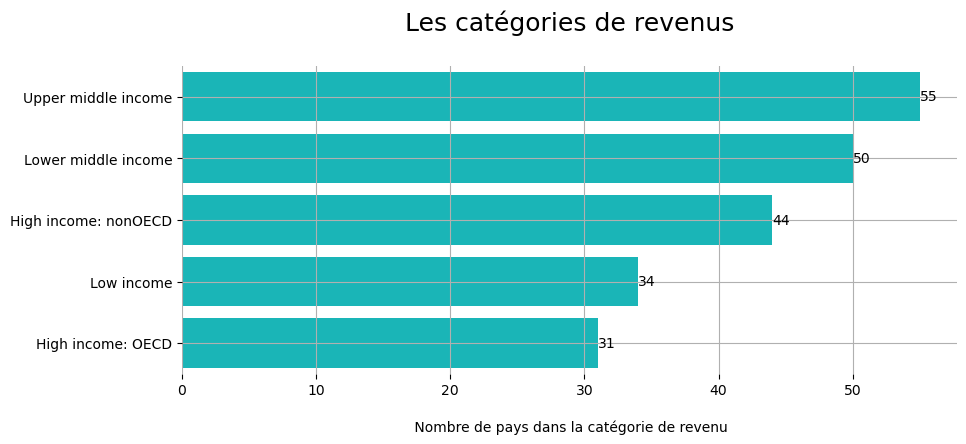

<IPython.core.display.Javascript object>

In [284]:
plt.figure(figsize=(10, 4))
rev = sns.barplot(
    x=income.values, y=income.index, color="darkturquoise"
)  # Affiche le graphique en bar du nombre de pays par rapport aux revenus

for s in ["top", "bottom", "left", "right"]:
    rev.spines[s].set_visible(False)

rev.bar_label(rev.containers[0])  # affiche le nombre au bout de la bar du graphe

plt.grid()
plt.title("Les catégories de revenus\n ", fontsize=18)
plt.xlabel("\n Nombre de pays dans la catégorie de revenu")

Nous constatons que la majorité des pays possédent un revenu moyen dont 55 ayant un revenu moyen supérieur. Cette information est plutôt optimiste pour notre école.

### Tableau croisé régions et revenus

Il serait intéressent de combiner les données sur les régions et leurs revenus. Ainsi nous créerons un tableau croisé de ces données.

In [285]:
# tableau croisé de la catégorie de revenu en fonction du nombre de pays dans la région
region_income = pd.crosstab(EdStatsCountry["Region"], EdStatsCountry["Income Group"])
region_income

Income Group,High income: OECD,High income: nonOECD,Low income,Lower middle income,Upper middle income
Region,,,,,
East Asia & Pacific,4,8,3,12,9
Europe & Central Asia,23,13,1,7,13
Latin America & Caribbean,1,14,1,7,18
Middle East & North Africa,1,7,0,6,7
North America,2,1,0,0,0
South Asia,0,0,3,4,1
Sub-Saharan Africa,0,1,26,14,7


<IPython.core.display.Javascript object>

On constate que les pays d'Afrique Subsaharienne ont la majorité de leurs pays dans les catégories de revenus faible et moyenne basse à l'inverse de l'Europe et l'Asie centrale.                                                                  

Nous pouvons améliorer la lisibilité de ce tableau en la transformant sous forme de carte thermique comme ci-dessous.

Text(0.5, 1.0, 'Nombre de pays dans chaque région appartenant à une catégorie revenu\n')

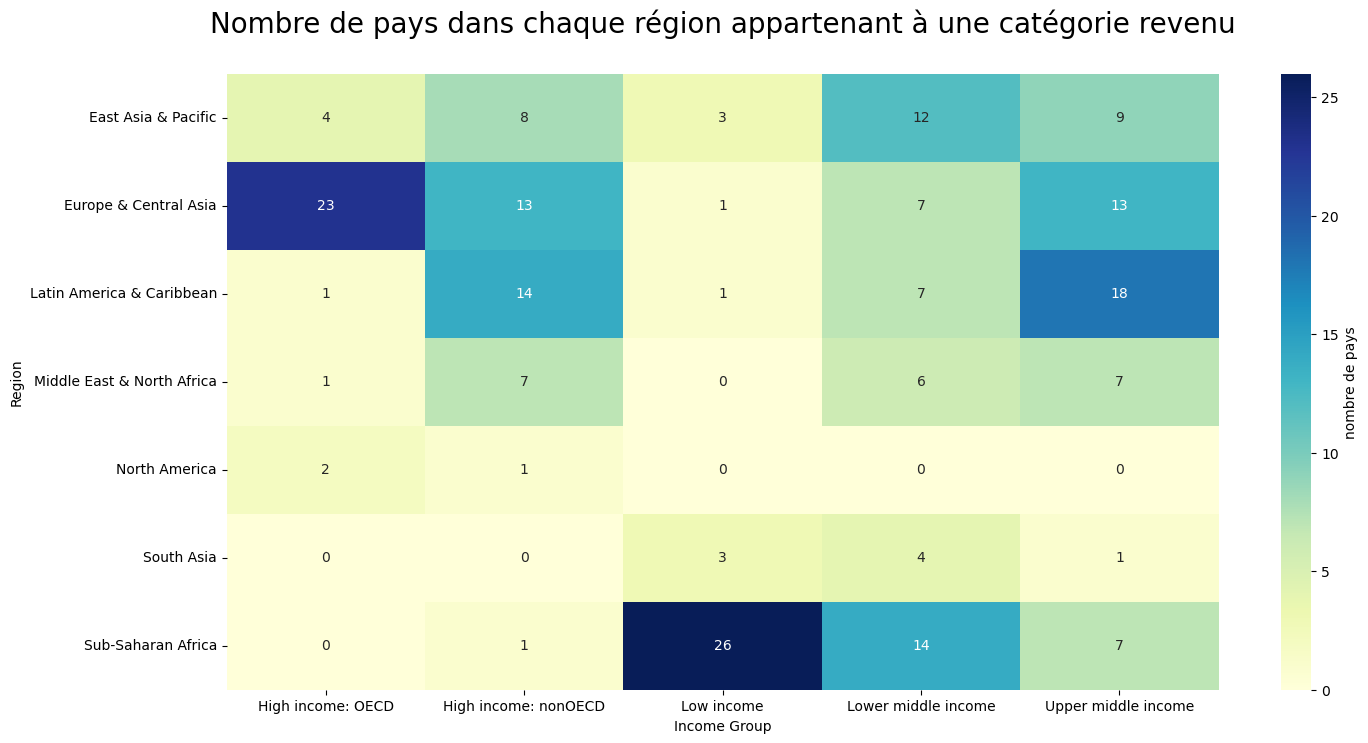

<IPython.core.display.Javascript object>

In [286]:
# création carte de thermique
plt.figure(figsize=(16, 8))
sns.heatmap(
    region_income, cmap="YlGnBu", cbar_kws={"label": "nombre de pays"}, annot=True
)
plt.title(
    "Nombre de pays dans chaque région appartenant à une catégorie revenu\n",
    fontsize=20,
)

Cette carte contient des informations globale sur l'économie. Plus la couleur est foncé plus le nombre de pays est grand et inversement. Par exemple L'Afrique subsaharienne possède 26 pays dans la catégorie faible revenu.

D'après nos tableaux croisé nous pouvons faire l'hypothèse que les pays d'Eurasie, d'Amérique latine et Caraïbes représenteraient un plus grand intérêt économique pour notre école.

## 2.3 EdStatsData

### 2.3.1 Description de EdStatsData

In [287]:
path + "EdStatsData.csv"  # le chemin de la donnée EdStatsData"

'C:/Users/maimo/Documents/projet 1/EdStatsData.csv'

<IPython.core.display.Javascript object>

In [288]:
EdStatsData = pd.read_csv(path + "EdStatsData.csv")
EdStatsData.head()  # Afficher les 5 première ligne du data EdStatsData

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [289]:
EdStatsData.shape  # nombre ligne et colonne

(886930, 70)

<IPython.core.display.Javascript object>

Le fichier contenant 886930 lignes et 70 colonnes est un fichier lourd et par conséquent long à executer. 

En somme, le fichier EdStatsData est un dataframe qui nous informe sur l'évolution des indicateurs dans le temps dans un pays 

In [290]:
EdStatsData.columns  # affiche les colonnes

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

<IPython.core.display.Javascript object>

### 2.3.2 Nettoyage de données de EdStatsData

### Supprimer les colonnes inutiles

In [291]:
EdStatsData.info()  # informe sur le nombre de valeurs non nulle dans une colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

<IPython.core.display.Javascript object>

On constate que la dernière colonne 'Unnamed: 69' possède aucune valeur non nulle ainsi elle est vide donc il faudra la supprimer. Cette fois-ci nous utiliseront une méthode différente de la  précédente 'EdStatsData.drop(['nom de la colonne'],axis=1)' qui est  'EdStatsData.dropna(how="all", axis=1)' qui efface toutes les colonnes ayant aucune valeurs.

In [292]:
EdStatsData = EdStatsData.dropna(
    how="all", axis=1
)  # on supprime toutes les colonnes ayant aucunes valeurs
EdStatsData.columns  # vérifie que la colonne 'Unnamed: 69' est supprimée

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

<IPython.core.display.Javascript object>

La colonne Unnamed: 69 contenant aucune valeur est bien supprimée de nos données

In [293]:
EdStatsData.shape  # le nombre de colonne et ligne du data EdStatsData

(886930, 69)

<IPython.core.display.Javascript object>

Avant modification, il y avait 70 colonnes. Actuellement nous avons 69 colonnes donc une seule colonne celle Unnamed: 69 a été supprimé .

### Supprimer les non pays

In [294]:
# Affiche toutes les valeurs uniques de la colonne Country Name
EdStatsData["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


<IPython.core.display.Javascript object>

En affichant tous les noms présents dans la colonne Country Name de EdStatsCountry on aperçoit la présence de nom tel que 'Arab World' ou 'East Asia & Pacific (developing only)' qui ne sont pas des pays. De surcroît, nous allons devoir les supprimer. Afin d'effacer tous ces faux pays on va manuellement créer une liste de non pays 'NoCountry', puis on retira les éléments appartenant à cette liste de notre colonne Country Name.

In [295]:
NoCountry=[
    'Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 
       'West Bank and Gaza']


<IPython.core.display.Javascript object>

In [296]:
# Affecter une varible avec les index des non pays 'NoCountry' dans le EdStatsData
index_NoCountry = EdStatsData.loc[EdStatsData["Country Name"].isin(NoCountry)].index
index_NoCountry

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            875925, 875926, 875927, 875928, 875929, 875930, 875931, 875932,
            875933, 875934],
           dtype='int64', length=95290)

<IPython.core.display.Javascript object>

In [297]:
# supprimer toutes les lignes d'un index_NoCountry
EdStatsData.drop(index=index_NoCountry, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [298]:
# Affiche toutes les valeurs uniques de la colonne Country Name après modification
EdStatsData["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fij

<IPython.core.display.Javascript object>

Tous les lieux n'étant pas des pays ont bien été supprimer de EdStatsData

In [299]:
EdStatsData.shape

(791640, 69)

<IPython.core.display.Javascript object>

In [300]:
886930 - 791640  # soustraction du nombre de lignes après la modification à celui avant

95290

<IPython.core.display.Javascript object>

Avant modification, il y avait 886930 lignes. Maintenant nous avons 791640 lignes donc on a supprimé 95290 lignes.

### 2.3.3  Exploration de EdStatsData

### Année

On va s'intéresser aux colonnes des années de ce data

In [301]:
EdStatsData.columns  # affiche tous colonnes du data EdStatsData

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

<IPython.core.display.Javascript object>

Dans le but de sélectionner uniquement les colonnes des années nous allons prendre les colonnes à partir de la colonne 1970. ainsi nous allons utiliser la méthode loc[:,'1970':]

In [302]:
# le nombre de données renseignés par année (par ordre de décroissant)
EdStatsData.loc[:, "1970":].count().sort_values(ascending=False)

2010    232398
2005    175066
2000    167629
2012    137545
2011    136505
         ...  
1972     31594
1974     31551
1973     31397
2016     15647
2017       143
Length: 65, dtype: int64

<IPython.core.display.Javascript object>

Nous pouvons constater que l'année ayant plus données rempli est 2010 avec 232398 sachant que les autres années possède moins de 200 000 données renseignées. L'année 2017 fût l'année ayant moins données entrées avec seulement 147 entrées.
Afin de mieux observer l'évolution du taux de remplissage des indicateurs au cours des années nous allons l'exprimer sous forme de graphe.

In [303]:
# On compte le nombre d'indicateurs renseignés par année
annee = EdStatsData.loc[:, "1970":].count()
annee

1970    68546
1971    31678
1972    31594
1973    31397
1974    31551
        ...  
2080    50820
2085    50820
2090    50820
2095    50820
2100    50820
Length: 65, dtype: int64

<IPython.core.display.Javascript object>

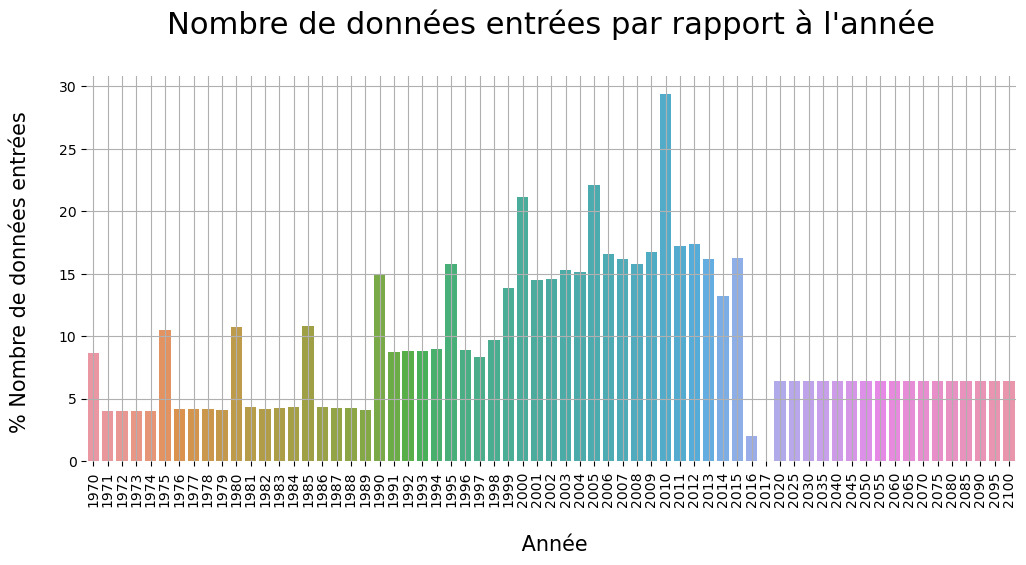

<IPython.core.display.Javascript object>

In [304]:
plt.figure(figsize=(12, 5))

# réalisation du graphique, on divise par 791640  et multiplie par 100 pour obtenir un pourcentage
NbEntree = sns.barplot(x=annee.index, y=annee.values / 791640 * 100)
plt.xticks(rotation=90)  # les noms des axes d'abscisses à la verticale


for s in ["top", "bottom", "left", "right"]:  # supprimer les bordure du graphe
    NbEntree.spines[s].set_visible(False)


plt.title("Nombre de données entrées par rapport à l'année\n", fontsize=22)
plt.xlabel("\n Année", fontsize=15)
plt.ylabel("% Nombre de données entrées \n", fontsize=15)
plt.grid()
plt.show()

La période ayant le plus d'indicateurs renseignés est la période entre 2000 et 2015 dont le pourcentage atteint majoritairement les 15% de données renseignées. 2010 est l'année ayant été le plus renseigné avec 29% des indicateurs complétés. De plus nous observons un pic d'information tous les 5ans.

### Les indicateurs les plus renseignés

In [305]:
EdStatsData.nunique()

Country Name        216
Country Code        216
Indicator Name     3665
Indicator Code     3665
1970              20895
                  ...  
2080               7367
2085               7231
2090               7042
2095               6940
2100               6809
Length: 69, dtype: int64

<IPython.core.display.Javascript object>

Dans la dernière partie de l'exploration de EdStatsData nous allons nous intéresser aux indicateurs les plus renseignés. 

In [306]:
EdStatsData.columns[
    4:
]  # affiche toutes les colonnes à partir de la 4e colonnes donc les colonnes des années

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

<IPython.core.display.Javascript object>

In [307]:
colnum = EdStatsData.select_dtypes(
    include=np.number
).columns  # colnum = toutes les colonnes numériques EdStatsData
colnum

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

<IPython.core.display.Javascript object>

In [308]:
temp = EdStatsData.groupby(["Indicator Code", "Indicator Name"])[
    colnum
].count()  # tableau indicator code et name avec annee
temp.head()

,,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator Code,Indicator Name,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with no education,144,0,0,0,0,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 with no education,144,0,0,0,0,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age 15+ with no education,144,0,0,0,0,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ with no education,144,0,0,0,0,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age 20-24 with no education,144,0,0,0,0,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [309]:
indicateurED = temp.sum(axis=1).sort_values(
    ascending=False
)  # affiche les indicateurs les plus fréquents par ordre décroissant
indicateurED

Indicator Code          Indicator Name                                                                        
SP.POP.TOTL             Population, total                                                                         9962
SP.POP.GROW             Population growth (annual %)                                                              9957
SE.PRM.AGES             Official entrance age to primary education (years)                                        9583
SE.PRM.DURS             Theoretical duration of primary education (years)                                         9583
UIS.THDUR.0             Theoretical duration of pre-primary education (years)                                     9532
                                                                                                                  ... 
LO.EGRA.NCWPM.AFA.2GRD  EGRA: Correct Non-Words Read Per Minute (Mean). Afan Oromo. 2nd Grade                        1
LO.EGRA.ORF.FLF.2GRD    EGRA: Oral Reading Fluency - Cor

<IPython.core.display.Javascript object>

Les indicateurs SP.POP.TOTL (population totale) et SP.POP.GROW (croissance démographique) sont les plus renseignés ce qui rejoint le data EdStatsCountry-Series

In [310]:
indicateurED.to_frame().to_csv(
    path + "indicateurED.csv"
)  # sauvegarder le data dans un fichier
# la sauvegarde nous servira plus tard afin de sélectionner nos indicateurs

<IPython.core.display.Javascript object>

## 2.4 EdStatsFootNote

### 2.4.1 description de EdStatsFootNote

In [311]:
path + "EdStatsFootNote.csv"  # le chemin de EdStatsFootNote

'C:/Users/maimo/Documents/projet 1/EdStatsFootNote.csv'

<IPython.core.display.Javascript object>

In [312]:
EdStatsFootNote = pd.read_csv(
    path + "EdStatsFootNote.csv"
)  # afficher les données du EdStatsFootNote
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


<IPython.core.display.Javascript object>

In [313]:
EdStatsFootNote.shape  # le nombre de lignes et colonnes de EdStatsFootNote

(643638, 5)

<IPython.core.display.Javascript object>

In [314]:
EdStatsFootNote.columns  # le noms des colonnes

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

<IPython.core.display.Javascript object>

Notre quatrième fichier est aussi sous forme de dataframe qu'on nommera EdStatsFootNote. Ce tableau possède 643638 lignes et 5 colonnes dont Year qui correspond l'année de l'enquête. Ce data nous renseigne sur les dates d'origine de Descriptions

### 2.4.2 Nettoyage de données de EdStatsFootNote

In [315]:
EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


<IPython.core.display.Javascript object>

Nous remarquons que la  série  "Unnamed: 4"  indique 0 non-null, donc elle n'a aucune valeur.  Ainsi nous pouvons effacer la série sans conséquence sur l'analyse de notre jeu de données.

In [316]:
EdStatsFootNote = EdStatsFootNote.dropna(
    how="all", axis=1
)  # on supprime toutes les colonnes ayant aucunes valeurs
EdStatsFootNote.columns  # verifie que les colonnes ayant aucune valeurs indiquées sont supprimées

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'], dtype='object')

<IPython.core.display.Javascript object>

 La colonne "Unnamed: 4" a bien été supprimé

### 2.4.3 Exploration de EdStatsFootNote

In [317]:
EdStatsFootNote.nunique()

CountryCode     239
SeriesCode     1558
Year             56
DESCRIPTION    9102
dtype: int64

<IPython.core.display.Javascript object>

### Seriescode

In [318]:
EdStatsFootNote["SeriesCode"].unique()  # Affiche les indicateurs

array(['SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'SE.PRE.TCHR.FE', ...,
       'UIS.AFR.GTCTR.2.F', 'UIS.AFR.GTCTR.2.M', 'UIS.AFR.GTCTR.2.T'],
      dtype=object)

<IPython.core.display.Javascript object>

In [319]:
seriescodes4 = EdStatsFootNote[
    "SeriesCode"
].value_counts()  # Affiche les indicateurs et le nombre de fois étant renseigné
seriescodes4

SH.DYN.MORT                 9226
SE.PRM.AGES                 8771
SE.PRM.DURS                 8771
SE.SEC.DURS                 8619
SE.SEC.AGES                 8581
                            ... 
SABER.STD.ASS.GOAL1.LVL2       1
SABER.STD.ASS.GOAL2            1
SABER.STD.ASS.GOAL2.LVL1       1
SABER.STD.ASS.GOAL2.LVL2       1
UIS.XSPENDP.1.FDPUB.FNS        1
Name: SeriesCode, Length: 1558, dtype: int64

<IPython.core.display.Javascript object>

Les indicateurs les plus renseignés sont les suivants avec plus de 8500 valeurs :

SH.DYN.MORT : Taux de mortalité, moins de 5 ans (pour 1 000 naissances vivantes)             
SE.PRM.AGES : Âge d'entrée à l'école primaire (ans)              
SE.PRM.DURS : Enseignement primaire, durée (années)           
SE.SEC.DURS : Enseignement secondaire, durée (années)             
SE.SEC.AGES : Âge d'entrée au premier cycle du secondaire (années)              

###  Countrycode

In [320]:
EdStatsFootNote["CountryCode"].unique()  # Affiche les codes des pays

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY',
       'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA',
       'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG',
       'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA',
       'LMC', 'LMY',

<IPython.core.display.Javascript object>

In [321]:
countrycode4 = EdStatsFootNote[
    "CountryCode"
].value_counts()  # Affiche la fréquence du code du pays dans le dataframe
countrycode4

LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: CountryCode, Length: 239, dtype: int64

<IPython.core.display.Javascript object>

Les pays les plus représentés sont Liechtenstein (LIC), le Chypre (CYP) et  L'Afrique du Sud(LDC), tandis que Îles Mariannes du Nord (MNP) et Îles Féroé (FRO) sont les moins représentés

Ce data EdStatsFootNote bien que riche en informations ne nous sera pas utile pour répondre à notre problèmatique. 

## 2.5 EdStatsSeries

### 2.5.1 Description de EdStatsSeries

In [322]:
path + "EdStatsSeries.csv"  # le chemin de la donnée EdStatsCountry-Series

'C:/Users/maimo/Documents/projet 1/EdStatsSeries.csv'

<IPython.core.display.Javascript object>

In [323]:
EdStatsSeries = pd.read_csv(
    path + "EdStatsSeries.csv"
)  # afficher les données du fichier
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [324]:
EdStatsSeries.shape

(3665, 21)

<IPython.core.display.Javascript object>

EdStatsSeries est un dataframe possèdant 3665 lignes et 21 colonnes. 

### 2.5.2 Nettoyage de données de EdStatsSeries

In [325]:
EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<IPython.core.display.Javascript object>

On remarque que plusieurs colonnes n'ont aucune valeur :
        
    - Unit of measure
    -Notes from original source
    -Other web links
    -Related indicators
    -License Type
    -Unnamed: 20
Nous allons donc supprimer tous ces variables.

In [326]:
EdStatsSeries = EdStatsSeries.dropna(
    how="all", axis=1
)  # on supprime toutes les colonnes ayant aucune valeurs
EdStatsSeries.info()  # verifie que les colonnes ayant aucune valeurs sont supprimées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                               3665 n

<IPython.core.display.Javascript object>

Les colonnes citées précédement sont bien supprimées

### 2.5.3 Exploration de EdStatsSeries

In [327]:
EdStatsSeries.nunique()

Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
dtype: int64

<IPython.core.display.Javascript object>

Nous allons explorer rapidement  certaines colonnes.

### SeriesCode

In [328]:
seriescodes4 = EdStatsSeries["Series Code"].value_counts()
seriescodes4

BAR.NOED.1519.FE.ZS            1
SP.POP.0710.FE.UN              1
SP.POP.0710.TO.UN              1
SP.POP.0711.FE.UN              1
SP.POP.0711.MA.UN              1
                              ..
LO.PASEC.MAT5.LO.MA            1
LO.PASEC.MAT5.MA               1
LO.PASEC.REA.2                 1
LO.PASEC.REA.2.FE              1
XGDP.56.FSGOV.FDINSTADM.FFD    1
Name: Series Code, Length: 3665, dtype: int64

<IPython.core.display.Javascript object>

### Topic

In [329]:
Topic = EdStatsSeries["Topic"].value_counts()
Topic

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

<IPython.core.display.Javascript object>

Topic regroupe les différents thèmes des indicateurs sur l'éducation, l'économie et la santé d'un pays

### Limitations and exceptions

In [330]:
method = EdStatsSeries["Limitations and exceptions"].value_counts()
# la description des limites de notre jeu de données, le texte étant assez long nous ne l'afficherons pas

<IPython.core.display.Javascript object>

Les limites : la recherche nous informe qu'il faut prendre les données avec du recule et précaution, notamment celles sur la démographie et le secteur de l'emploi. En outre pour les données démograpiques les systèmes complets d'enregistrement de l'état civil sont assez rares dans les pays en développement. Ainsi nous avons des estimations obtenues à partir d'enquêtes par sondage ou dérivées en appliquant des techniques d'estimation indirecte aux données d'enregistrement. Puis dans le cas de l'emploi (premier travail, chômage, inactivité) cela évolue selon les pays et la période (ex : l'agriculture), ainsi il est difficile de les mesurer précisement.

# 3. Préparation des données pour le classement des pays prioritaire pour notre étude

À partir de maintenant nous allons rentrer dans le vif du sujet. La première étape sera déterminer notre publique. On se rappelle nous sommes une école numérique demandant un niveau requis de lycéen ou universitaire.

Les facteurs les plus importants sont donc : 

    -L'âge 
    -Le niveau éducatif
    -Les revenus de la population afin financier notre école 
    -L'accés à un ordinateur et à internet

## 3.1 Public visé

On peut choisir avec le fichier indicateurED  qu'on avait créer précédement sur excel pour une meilleur visibilité.

Les indicateurs que nous utiliserons sont :

    
    -'SP.POP.1564.TO' : la population entre 15 et 64
    -'SP.POP.1014.TO.UN' : la population 10 à 14 ans ( pour avoir une vision de l'évolution population sur les 4 prochaines années) 
    
     -SE.TER.ENRL : le nombre d'inscriptions dans l'enseignement tertiaire, tous programmes confondus, pour les deux sexes
     -SE.SEC.ENRR : taux scolarisation (enroulement) en secondaire
    
    -'IT.CMP.PCMP.P2' : l'utilisation d'un ordinateur
    -'IT.NET.USER.P2' : l'utilisation internet
 
    
    -'NY.GNP.PCAP.PP.CD' : le PIB et La parite du PIB par habitant
    -'UIS.XGDP.56.FSGOV' : le financement publique dédié à l'enseignement supérieur
    
    
    Nous avons ainsi 8 indicateurs qui nous permettrons de savoir si le pays nous intéressera. 

## 3.2 Nettoyage de données

### 3.2.1 Nettoyer les données pour conserver les indicateurs qui nous intéressent

In [331]:
# Réalisation d'une liste des indicateurs retenus
indicateurs_retenus = [
    "SP.POP.1564.TO",
    "SP.POP.1014.TO.UN",
    "SE.TER.ENRL",
    "SE.SEC.ENRR",
    "IT.CMP.PCMP.P2",
    "IT.NET.USER.P2",
    "NY.GNP.PCAP.PP.CD",
    "UIS.XGDP.56.FSGOV",
]

<IPython.core.display.Javascript object>

Nous devons modifier notre data EdStatsData afin de conserver que les indicateurs retenus. Cependant, faire directement de grandes modifications dans un data serait imprudent. Ainsi, il serait plus avisé de réaliser une copie qu'on modifiera. Ici la copie du data EdStatsData s'appellera EdStatsData2.

In [332]:
EdStatsData2 = EdStatsData.copy()  # Faire une copy du EdStatsData
EdStatsData2.head()  # affiche uniquement les 5 première lignes du data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Maintenant qu'on a la copie de notre data, EdStatsData2, nous allons pouvoir la modifier. On va concerver uniquement les lignes concernant les indicateurs retenus

In [333]:
# on filtre les lignes ayant les indicateurs retenus et on l'affecte à la variable EdStatsData2
EdStatsData2 = EdStatsData2.loc[
    EdStatsData2["Indicator Code"].isin(indicateurs_retenus)
]
EdStatsData2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.732000e+03,9.409000e+03,9.817000e+03,1.148700e+04,1.095600e+04,1.225600e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92891,Afghanistan,AFG,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,8.422430e+00,8.684790e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885690,Zimbabwe,ZWE,"Population, ages 10-14, total",SP.POP.1014.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [334]:
print(EdStatsData.shape)  # nombre de lignes et de colonne du data orignial
print(EdStatsData2.shape)  # nombre de lignes et de colonnes du data modifié

(791640, 69)
(1728, 69)


<IPython.core.display.Javascript object>

Nous pouvons voir la suppression de nombreuses lignes. Afin de vérifier qu'on a bien gardé uniquement nos 8 indicateurs. Nous allons comparer le nombre 'Indicator Code' avant et après la suppression 

In [335]:
# Affiche le nombre de valeur unique dans une colonne (parmi les 4 premières colonnes)
# avant la suppression
EdStatsData.iloc[:, [0, 1, 2, 3]].nunique()

Country Name       216
Country Code       216
Indicator Name    3665
Indicator Code    3665
dtype: int64

<IPython.core.display.Javascript object>

In [336]:
# Affiche le nombre de valeur unique dans une colonne (parmi les 4 premières colonnes)
# après la suppression
EdStatsData2.iloc[:, [0, 1, 2, 3]].nunique()

Country Name      216
Country Code      216
Indicator Name      8
Indicator Code      8
dtype: int64

<IPython.core.display.Javascript object>

Nous pouvons observer que les colonnes 'Indicator Name' et 'Indicator Code' sont passées de 3665 valeurs uniques  à 8 valeurs uniques. Ainsi, on a bien réussi à filtrer notre EdStatsData2 afin de conserver uniquement les 8 indicateurs qui nous intéressent.

### 3.2.2 Supprimer les lignes qui sont vides

À ce stade nous savons que les 4 premières colonnes sont remplies. Cependant ce n'est pas forcement le cas pour les colonnes des années. Nous allons ainsi supprimer les lignes ayant toutes les colonnes numérique vides.

In [337]:
# on sélectionne uniquement les colonnes numériques
colnum = EdStatsData2.select_dtypes(include=np.number).columns
colnum

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Avant suppression

In [338]:
EdStatsData2.shape  # nombre de ligne et de colonne de notre data avant suppression

(1728, 69)

<IPython.core.display.Javascript object>

In [339]:
EdStatsData2.iloc[:, [0, 1, 2, 3]].nunique()  # valeur unique avant suppression

Country Name      216
Country Code      216
Indicator Name      8
Indicator Code      8
dtype: int64

<IPython.core.display.Javascript object>

#### Après suppression

In [340]:
# On supprime toutes les lignes n'ayant aucune valeurs dans toutes les colonnes numériques
EdStatsData2.dropna(subset=colnum, axis=0, how="all", inplace=True)

<IPython.core.display.Javascript object>

In [341]:
EdStatsData2.shape  # nombre de ligne et de colonne de notre data après suppression

(1544, 69)

<IPython.core.display.Javascript object>

In [342]:
EdStatsData2.iloc[:, [0, 1, 2, 3]].nunique()

Country Name      214
Country Code      214
Indicator Name      8
Indicator Code      8
dtype: int64

<IPython.core.display.Javascript object>

In [343]:
1728 - 1544  # différence entre nombre de lignes avant et après la suppression

184

<IPython.core.display.Javascript object>

Nous sommes passés de 1728 lignes à 1544 lignes avec le filtrage. Ainsi on a supprimé 184 lignes. De plus, nous constatons qu'avec la méthode nunique que le nombre de valeurs unique de 'Country Name' est passé de 216 à 214. Par conséquent, en réalisant cette manipulation nous avons retiré 2 pays de notre jeu de donnée EdStatsData2.

###  3.2.3 Supprimer les colonnes qui sont vides

Dans la même optique que lignes vides pour toutes les colonnes numériques, nous allons effacer les colonnes numériques complètement vide.

In [344]:
print("taille avant suppression de colonnes vides", EdStatsData2.shape)
EdStatsData2.dropna(how="all", axis=1, inplace=True)
print("taille après suppression de colonnes vides", EdStatsData2.shape)

taille avant suppression de colonnes vides (1544, 69)
taille après suppression de colonnes vides (1544, 51)


<IPython.core.display.Javascript object>

Nous avons supprimé 12 colonnes numériques qui étaient vide.

In [345]:
# Mise à jour de la variable colnum
colnum = EdStatsData2.select_dtypes(include=np.number).columns
colnum

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

<IPython.core.display.Javascript object>

Nous constatons que les colonnes des années superieurs à 2016 ont disparu.

### 3.2.4 Sélection des pays ayant tout leurs indicateurs renseignés

Actuellement nous avons effectué 3 filtrations. Ainsi nous n'avons aucune ligne ayant toutes leurs colonnes numériques vide ou n'apparenant pas au indicateurs choisis.
                                                                                                                                                                                                             
Pour la suite de notre analyse, dans le but d'être objectif dans la comparaison finale, nous nous focaliserons seulement sur les pays ayant tous nos indicateurs retenus renseignés.

In [346]:
# affiche nos indicateurs retenus
indicateurs_retenus

['SP.POP.1564.TO',
 'SP.POP.1014.TO.UN',
 'SE.TER.ENRL',
 'SE.SEC.ENRR',
 'IT.CMP.PCMP.P2',
 'IT.NET.USER.P2',
 'NY.GNP.PCAP.PP.CD',
 'UIS.XGDP.56.FSGOV']

<IPython.core.display.Javascript object>

Dans le but de filtrer les pays n'ayant pas tous nos indicateurs renseignés, nous allons créer un tableau croisé des pays ('Country Name') par rapport au indicateur retenus ('Indicator Code').
Notre tableau sera complétée par une valeur booléenne. En outre la valeur (1) signifiera que l'indicateur est renseigné et la valeur (0) signifiera que l'indicateur n'est renseigné pas.

In [347]:
# tableau croisé des pays en fonction des indicateurs present (1) ou absente (0)
country_to_soustract = pd.crosstab(
    EdStatsData2["Country Name"], EdStatsData2["Indicator Code"]
)
country_to_soustract

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRL,SP.POP.1014.TO.UN,SP.POP.1564.TO,UIS.XGDP.56.FSGOV
Country Name,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,0
Albania,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1
American Samoa,0,1,0,0,1,0,0,0
Andorra,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...
Vietnam,1,1,1,1,1,1,1,1
Virgin Islands (U.S.),1,1,0,0,1,0,1,0
"Yemen, Rep.",1,1,1,1,1,1,1,0


<IPython.core.display.Javascript object>

On observe que plusieurs pays n'ont pas tous les indicateurs renseigné par la présence d'un ou plusieurs 0 dans sa ligne tels que Afghanistan ou Andorra.

Afin de réaliser la filtration, nous allons procèder en 2 étapes. Tout d'abord créerons un sous tableau réunissiant toutes les pays ayant au moins un indicateur non rempli. Pour cela nous savons que si la moyenne des valeurs dans une ligne est égale à 1 alors la ligne a tous les indicateurs renseigné. De ce fait, si la moyenne est différente de 1 au moins indicateurs est absent pour la ligne. Ensuite la deuxième étape sera de retirer toutes les pays de ce sous tableau de notre data EdStatsData2.

In [348]:
# Sous tableau avec les lignes n'ayant pas tous les indicateurs retenus renseignés
country_to_soustract = country_to_soustract.loc[country_to_soustract.mean(axis=1) != 1]
country_to_soustract

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRL,SP.POP.1014.TO.UN,SP.POP.1564.TO,UIS.XGDP.56.FSGOV
Country Name,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,0
American Samoa,0,1,0,0,1,0,0,0
Andorra,0,1,0,1,1,1,0,1
Aruba,1,1,0,1,1,1,1,1
"Bahamas, The",1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
Tuvalu,1,1,1,1,0,0,0,0
United Arab Emirates,1,1,1,1,1,1,1,0
Uzbekistan,1,1,1,1,1,1,1,0


<IPython.core.display.Javascript object>

In [349]:
# Suppression de ces lignes ayant pas tous les indicateurs remplis
print("Shape avant: ", EdStatsData2.shape)
EdStatsData2 = EdStatsData2.loc[
    ~EdStatsData2["Country Name"].isin(country_to_soustract.index)
]
print("Shape après la supressions: ", EdStatsData2.shape)

Shape avant:  (1544, 51)
Shape après la supressions:  (1216, 51)


<IPython.core.display.Javascript object>

In [350]:
1544 - 1216

328

<IPython.core.display.Javascript object>

Nous sommes passés de 1544 à 1216 lignes soit une suppression de 328 lignes dans notre jeu de donnée EdStatsData2

In [351]:
EdStatsData2.iloc[:, [0, 1, 2, 3]].nunique()

Country Name      152
Country Code      152
Indicator Name      8
Indicator Code      8
dtype: int64

<IPython.core.display.Javascript object>

In [352]:
214 - 152

62

<IPython.core.display.Javascript object>

Ainsi après filtration, il nous reste 152 pays. On a donc retirer 62 pays de notre jeu de donnée EdStatsData2. Pour la suite nous n'aurons plus besoin de filtrer notre data EdStatsData2.

Pour une analyse approndi nous aurions étudier les 58 pays au cas par cas afin d'éviter de passer à côté d'un potentiel pays. Dans notre projet nous n'allons pas s'attarder dessus car cela demande beaucoup de temps. 

# 4. Taux de remplissage des indicateurs sélectionnés

Dans cette partie nous allons approfondir l'analyse de notre data EdStatsData2 nettoyé. Il est toujours intéressent d'étudier le taux de remplissage globale de nos 8 indicateurs au cours du temps avant de nous lancer dans l'analyse approfondie EdStatsData2.

## 4.1 Analyse globale du taux de remplissage des indicateurs sélectionnés dans le temps

Nous allons nous intéresser au taux de remplissage de chaque indicateur au cours du temps

In [353]:
colnum  # affiche les colonnes numériques de 1970 à 2016

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

<IPython.core.display.Javascript object>

Dans un premier temps nous allons réaliser un tableau des indicateurs en fonction du temps.

In [354]:
# Création d'un tableau d'indicateur en fonction du temps
temp = EdStatsData2.groupby("Indicator Code")[colnum].count()
temp

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,1,0,0,0,0,1,1,1,1,1,...,39,23,2,0,0,0,0,0,0,0
IT.NET.USER.P2,6,0,0,0,0,6,6,6,6,6,...,152,152,151,152,152,151,152,152,152,152
NY.GNP.PCAP.PP.CD,0,0,0,0,0,0,0,0,0,0,...,151,151,151,151,151,149,149,149,147,145
SE.SEC.ENRR,35,115,111,105,103,100,110,104,103,103,...,127,123,122,118,122,117,113,113,96,5
SE.TER.ENRL,33,102,92,94,92,92,90,92,92,97,...,109,111,116,116,119,117,112,104,90,5
SP.POP.1014.TO.UN,0,0,0,0,0,0,0,0,0,0,...,150,150,150,150,150,150,150,150,150,0
SP.POP.1564.TO,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,151,151,151,151,151
UIS.XGDP.56.FSGOV,0,0,0,0,0,0,0,0,0,0,...,80,91,97,106,97,85,67,31,0,0


<IPython.core.display.Javascript object>

Dans le but d'obtenir le nombre le indicateurs renseigné dans le temps, nous ferons la somme du nombre d'indicateurs dans une colonne donc par année. 

In [355]:
# on fait la somme du nombres d'indicateur renseigné dans une année
indic_temp = temp.sum(axis=0)
indic_temp

1970     227
1971     369
1972     355
1973     351
1974     347
1975     351
1976     359
1977     355
1978     354
1979     359
1980     368
1981     387
1982     369
1983     371
1984     373
1985     369
1986     390
1987     368
1988     398
1989     406
1990     860
1991     752
1992     757
1993     776
1994     804
1995     855
1996     879
1997     863
1998     953
1999    1047
2000    1039
2001    1058
2002    1072
2003    1046
2004    1071
2005    1064
2006     997
2007     960
2008     953
2009     941
2010     945
2011     943
2012     920
2013     894
2014     850
2015     786
2016     458
dtype: int64

<IPython.core.display.Javascript object>

Afin de mieux observer l'évolution dans le temps du taux de remplissage des indicateurs, nous réalisons un graphique.

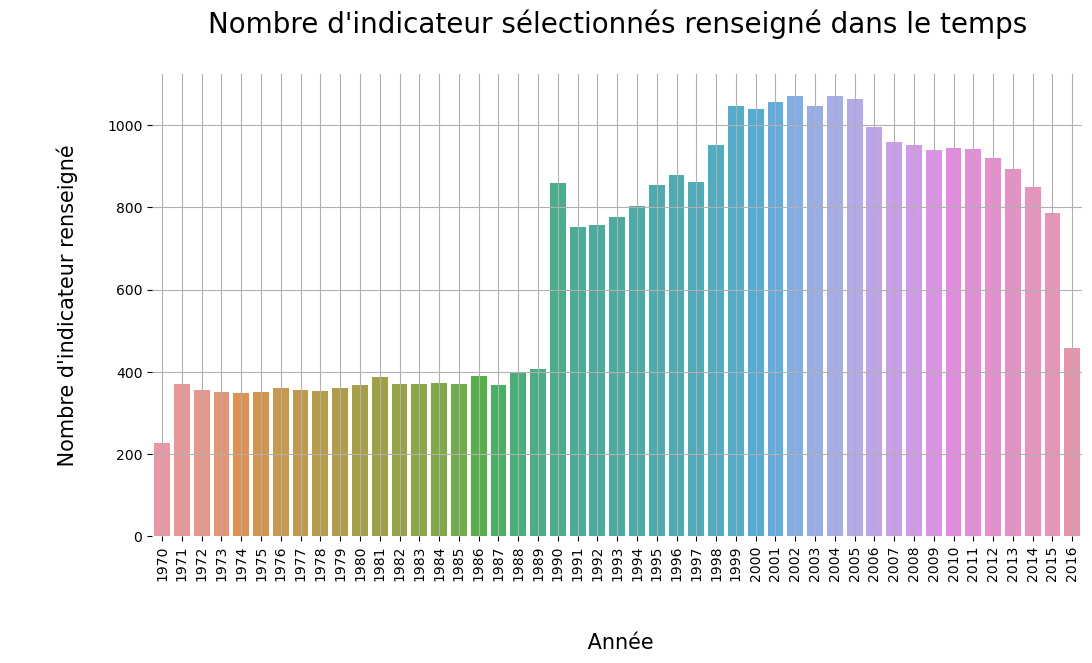

<IPython.core.display.Javascript object>

In [356]:
plt.figure(figsize=(12, 6))
evolution2 = sns.barplot(x=indic_temp.index, y=indic_temp.values)  # trace le graphe

plt.xticks(
    rotation=90
)  # la position des nom axes des abscisses du graphe sont à la verticale

for s in ["top", "bottom", "left", "right"]:  # supprime les bords du graphe
    evolution2.spines[s].set_visible(False)

plt.title("Nombre d'indicateur sélectionnés renseigné dans le temps\n", fontsize=20)
plt.xlabel("\n \n Année", fontsize=15)
plt.ylabel("\n \n Nombre d'indicateur renseigné \n", fontsize=15)
plt.grid()
plt.show()

À partir de 1990 il y a une hausse du remplissage de ces indicateurs. L'ensemble de ces indicateurs sont renseignés plus de 700 fois. En outre, il serait plus pertinant de réaliser un graphique du pourcentage des indicateurs renseignés.

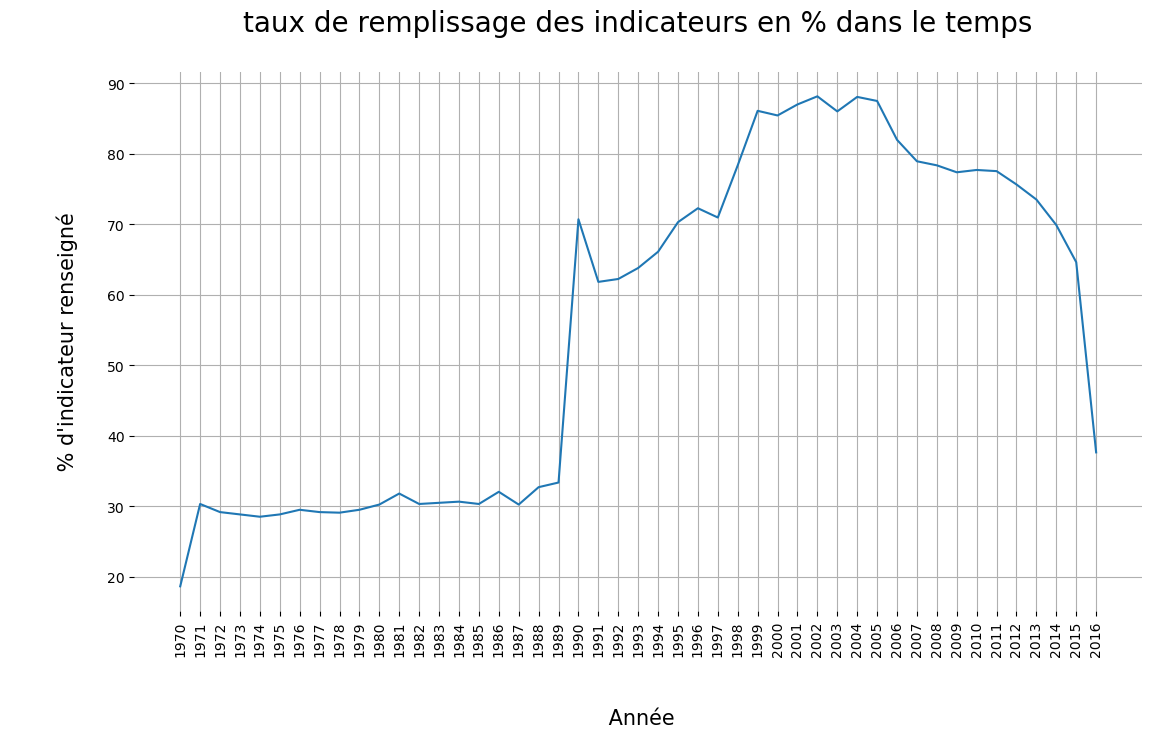

<IPython.core.display.Javascript object>

In [357]:
plt.figure(figsize=(13, 7))

# realiser le %
lineaire = sns.lineplot(
    x=indic_temp.index, y=indic_temp.values * 100 / EdStatsData2.shape[0]
)
plt.xticks(rotation=90)

for s in ["top", "bottom", "left", "right"]:
    lineaire.spines[s].set_visible(False)

plt.title("taux de remplissage des indicateurs en % dans le temps\n", fontsize=20)
plt.xlabel("\n \n Année", fontsize=15)
plt.ylabel("\n \n % d'indicateur renseigné \n", fontsize=15)
plt.grid()
plt.show()

Nous observons bien une hausse du remplissage entre 1990 et 2005 avec plus de 70% d'indicateur renseignés

## 4.2 Analyse spécifique du taux de remplissage des indicateurs sélectionnés au cours du temps

Maintenant nous allons nous focaliser sur le taux de remplissage de chacun des indicateurs au cours du temps.

In [358]:
temp = EdStatsData2.groupby("Indicator Code")[colnum].count()
temp

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,1,0,0,0,0,1,1,1,1,1,...,39,23,2,0,0,0,0,0,0,0
IT.NET.USER.P2,6,0,0,0,0,6,6,6,6,6,...,152,152,151,152,152,151,152,152,152,152
NY.GNP.PCAP.PP.CD,0,0,0,0,0,0,0,0,0,0,...,151,151,151,151,151,149,149,149,147,145
SE.SEC.ENRR,35,115,111,105,103,100,110,104,103,103,...,127,123,122,118,122,117,113,113,96,5
SE.TER.ENRL,33,102,92,94,92,92,90,92,92,97,...,109,111,116,116,119,117,112,104,90,5
SP.POP.1014.TO.UN,0,0,0,0,0,0,0,0,0,0,...,150,150,150,150,150,150,150,150,150,0
SP.POP.1564.TO,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,151,151,151,151,151
UIS.XGDP.56.FSGOV,0,0,0,0,0,0,0,0,0,0,...,80,91,97,106,97,85,67,31,0,0


<IPython.core.display.Javascript object>

In [359]:
# Réinitialiser l'index aux index par défaut ( 0, 1, 2,...)
temp = temp.reset_index()
temp

,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,IT.CMP.PCMP.P2,1,0,0,0,0,1,1,1,1,...,39,23,2,0,0,0,0,0,0,0
1,IT.NET.USER.P2,6,0,0,0,0,6,6,6,6,...,152,152,151,152,152,151,152,152,152,152
2,NY.GNP.PCAP.PP.CD,0,0,0,0,0,0,0,0,0,...,151,151,151,151,151,149,149,149,147,145
3,SE.SEC.ENRR,35,115,111,105,103,100,110,104,103,...,127,123,122,118,122,117,113,113,96,5
4,SE.TER.ENRL,33,102,92,94,92,92,90,92,92,...,109,111,116,116,119,117,112,104,90,5
5,SP.POP.1014.TO.UN,0,0,0,0,0,0,0,0,0,...,150,150,150,150,150,150,150,150,150,0
6,SP.POP.1564.TO,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,151,151,151,151,151
7,UIS.XGDP.56.FSGOV,0,0,0,0,0,0,0,0,0,...,80,91,97,106,97,85,67,31,0,0


<IPython.core.display.Javascript object>

In [360]:
# Nous organisons notre tableau d'une autre manière, une ligne a un indicateur, une année et sa valeur
data = temp.melt(id_vars="Indicator Code", value_vars=colnum)
data

,Indicator Code,variable,value
0,IT.CMP.PCMP.P2,1970,1
1,IT.NET.USER.P2,1970,6
2,NY.GNP.PCAP.PP.CD,1970,0
3,SE.SEC.ENRR,1970,35
4,SE.TER.ENRL,1970,33
...,...,...,...
371,SE.SEC.ENRR,2016,5
372,SE.TER.ENRL,2016,5
373,SP.POP.1014.TO.UN,2016,0
374,SP.POP.1564.TO,2016,151


<IPython.core.display.Javascript object>

Nous pouvons faire un graphique montrant l'évolution de chacun de indicateurs renseignés au cours du temps ce qui sera plus lisible et compréhensif que le tableau.

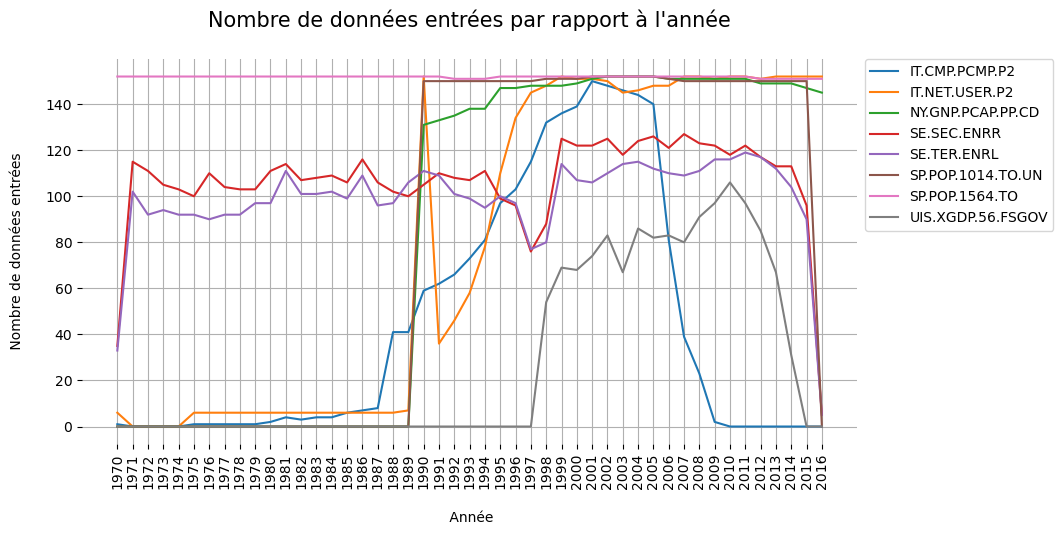

<IPython.core.display.Javascript object>

In [361]:
plt.figure(figsize=(10, 5))
IndicSolo = sns.lineplot(x="variable", y="value", data=data, hue="Indicator Code")

plt.xticks(rotation=90)

for s in ["top", "bottom", "left", "right"]:
    IndicSolo.spines[s].set_visible(False)

plt.legend(
    bbox_to_anchor=(1.01, 1), borderaxespad=0
)  # placer la legend à l'exterieur du graphe

plt.title("Nombre de données entrées par rapport à l'année\n", fontsize=15)
plt.xlabel("\n Année", fontsize=10)
plt.ylabel(" Nombre de données entrées \n", fontsize=10)
plt.grid()
plt.show()

 'IT.NET.USER.P2' : hausse à partir de 1989. L'apparition  d'internet et accès au grand publique en 1991.

## 4.3 Le taux de nos remplissage de chacun des indicateurs  indépendamment du temps

Il serait intéressant d'observer les indicateurs les plus renseignés indépendamment du temps

In [362]:
tableindic = EdStatsData2.groupby("Indicator Code")[colnum].count()
tableindic

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,1,0,0,0,0,1,1,1,1,1,...,39,23,2,0,0,0,0,0,0,0
IT.NET.USER.P2,6,0,0,0,0,6,6,6,6,6,...,152,152,151,152,152,151,152,152,152,152
NY.GNP.PCAP.PP.CD,0,0,0,0,0,0,0,0,0,0,...,151,151,151,151,151,149,149,149,147,145
SE.SEC.ENRR,35,115,111,105,103,100,110,104,103,103,...,127,123,122,118,122,117,113,113,96,5
SE.TER.ENRL,33,102,92,94,92,92,90,92,92,97,...,109,111,116,116,119,117,112,104,90,5
SP.POP.1014.TO.UN,0,0,0,0,0,0,0,0,0,0,...,150,150,150,150,150,150,150,150,150,0
SP.POP.1564.TO,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,151,151,151,151,151
UIS.XGDP.56.FSGOV,0,0,0,0,0,0,0,0,0,0,...,80,91,97,106,97,85,67,31,0,0


<IPython.core.display.Javascript object>

In [363]:
# nombre de fois où l'indicateur est renseigné dans ordre décroissant
indic_plus = tableindic.sum(axis=1).sort_values(ascending=False)
indic_plus

Indicator Code
SP.POP.1564.TO       7136
SE.SEC.ENRR          5007
SE.TER.ENRL          4651
NY.GNP.PCAP.PP.CD    3966
SP.POP.1014.TO.UN    3914
IT.NET.USER.P2       3713
IT.CMP.PCMP.P2       2062
UIS.XGDP.56.FSGOV    1320
dtype: int64

<IPython.core.display.Javascript object>

Les indicateurs sur le plublic sont les plus renseignés:                                                                                                                                                                                                                                          

-SP.POP.1564.TO (population entre 15 et 64 ans) avec   7136                                                                                                                                                                                                                                         
-SE.SEC.ENRR (enroulement du secondaires)  avec 5007                                                                                                                                                                                                                                         
-SE.TER.ENRL   (enroulement poste secondaire/universitaire avec   4651

Il serait plus judicieux d'effectuer une analyse graphique

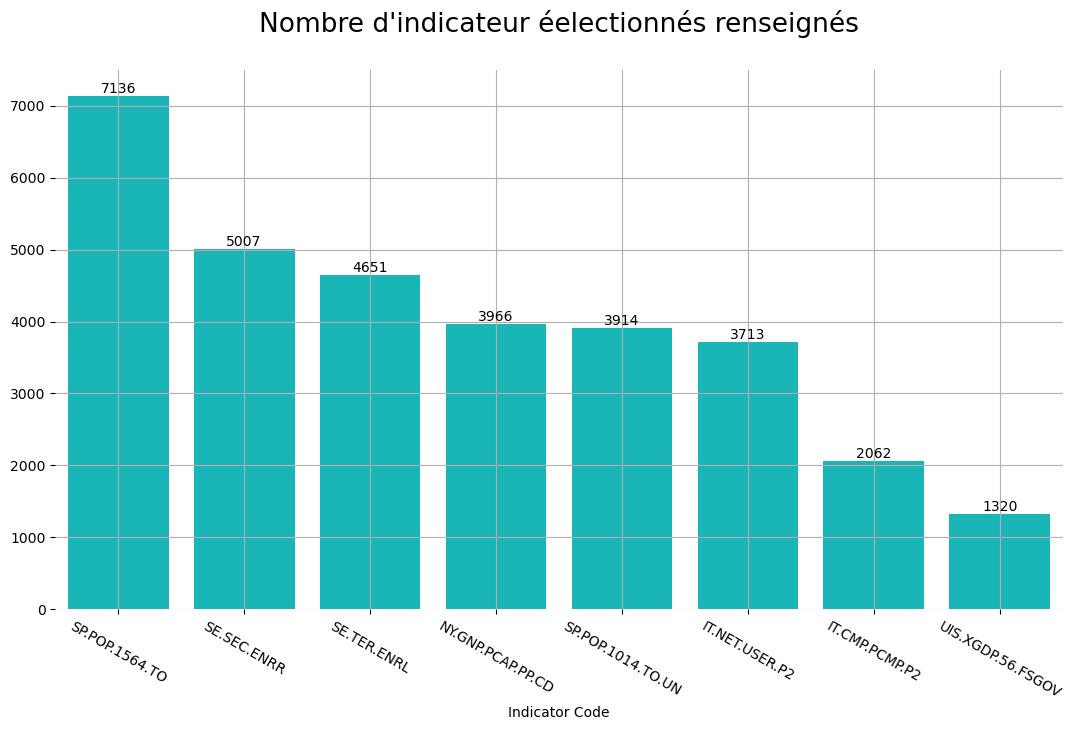

<IPython.core.display.Javascript object>

In [364]:
plt.figure(figsize=(13, 7))
evolution = sns.barplot(x=indic_plus.index, y=indic_plus.values, color="darkturquoise")
plt.xticks(rotation=90)

for s in ["top", "bottom", "left", "right"]:
    evolution.spines[s].set_visible(False)

evolution.bar_label(evolution.containers[0])
evolution.set_xticklabels(evolution.get_xticklabels(), rotation=-30)

plt.title("Nombre d'indicateur éelectionnés renseignés\n", fontsize=19)
plt.grid()
plt.show()

On peut voir que l'indicateur sur la population agée de 15 à 64 ans est la plus renseigné suivit des indicateurs sur l'enroulement du secondaire et le taux d'inscription aux études supérieurs 

Il serait intéressant de voir sous un autre angle ces informations. Ainsi nous allons comparer ce graphique avec graphique traduit en pourcentage. 

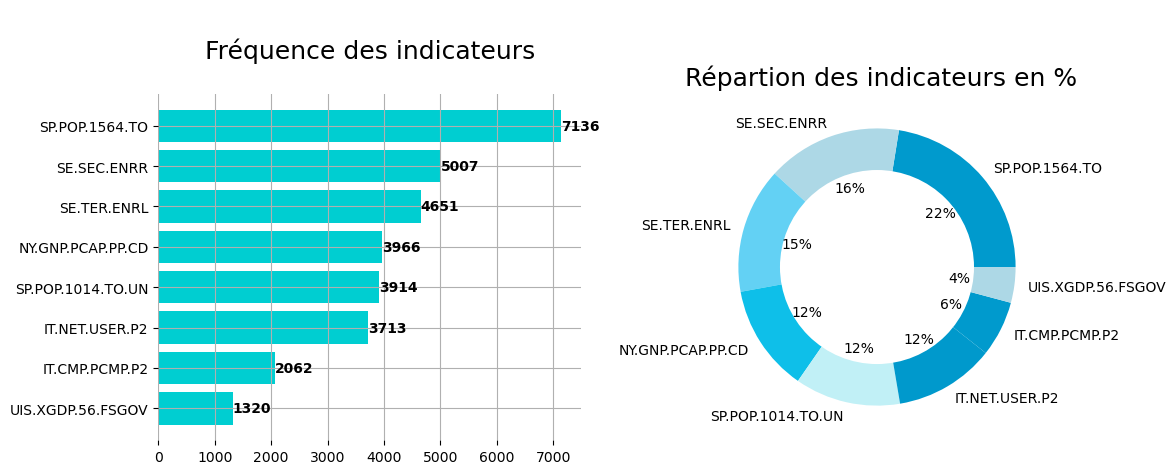

<IPython.core.display.Javascript object>

In [365]:
# Graphique 1 en bar

fig, (ax11, ax12) = plt.subplots(
    1, 2, figsize=(12, 4.5)
)  # Mettre 2 graphes côte à côte

ax11.barh(indic_plus.index, indic_plus.values, color="darkturquoise")  # graphe en bar

ax11.invert_yaxis()  # les valeurs sont dans l'ordre décroissant


# Supprimmer les bordures du graphe
for s in ["top", "bottom", "left", "right"]:
    ax11.spines[s].set_visible(False)

# Mettre les valeurs au bout de la bar du graphe
for i in ax11.patches:
    ax11.text(
        i.get_width() + 0.2,
        i.get_y() + 0.5,
        str(round((i.get_width()), 2)),
        fontsize=10,
        fontweight="bold",
        color="black",
    )


ax11.set_title(f"\n Fréquence des indicateurs \n", fontsize=18)  # titre graphe 1
ax11.grid()


# Graphique 2 circulaire


# palette de couleur bleu
color_palette_list = ["#009ACD", "#ADD8E6", "#63D1F4", "#0EBFE9", "#C1F0F6", "#0099CC"]

# tracer le camembert
ax12.pie(
    indic_plus.values,
    labels=indic_plus.index,
    autopct="%.0f%%",
    colors=color_palette_list,
)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")  # création d'un disque blanc
ax12.add_artist(centre_circle)  # le centre du graphe camembert est vide

ax12.set_title(f"\n Répartion des indicateurs en %", fontsize=18)  # titre du graphe 2

plt.show()

Nous observons que les données sur la population sont les plus renseigné avec 30%. Tandis que l'indicateur sur le financement publique pour l'éducation est le plus faible représentant seulement 4%.

## 4.4 La distribution

Une distribution est une fonction qui associe une fréquence d'apparition à une classe de valeur. Cette fonction permet de résumer l'information contenue dans un ensemble de données.                                                                                                                                                                                                                                                                                                                       
Dans un premier temps nous allons nous focaliser sur une année, l'année 2001 avec l'indicateur sur la population de 15 à 64ans 'SP.POP.1564.TO'. Puis nous réaliserons une fonction regroupant tous les indicateurs et les années.

In [366]:
# réalisation d'une table  indicateur 'SP.POP.1564.TO' en 2001
distrib = EdStatsData2.loc[
    EdStatsData2["Indicator Code"] == "SP.POP.1564.TO", ["Indicator Code", str(2001)]
]
distrib

,Indicator Code,2001
97776,SP.POP.1564.TO,1929881.0
101441,SP.POP.1564.TO,19734527.0
112436,SP.POP.1564.TO,8512581.0
116101,SP.POP.1564.TO,54558.0
119766,SP.POP.1564.TO,23341581.0
...,...,...
860096,SP.POP.1564.TO,105163.0
863761,SP.POP.1564.TO,15434682.0
867426,SP.POP.1564.TO,49453692.0
882086,SP.POP.1564.TO,5494519.0


<IPython.core.display.Javascript object>

<Axes: xlabel='Indicator Code', ylabel='2001'>

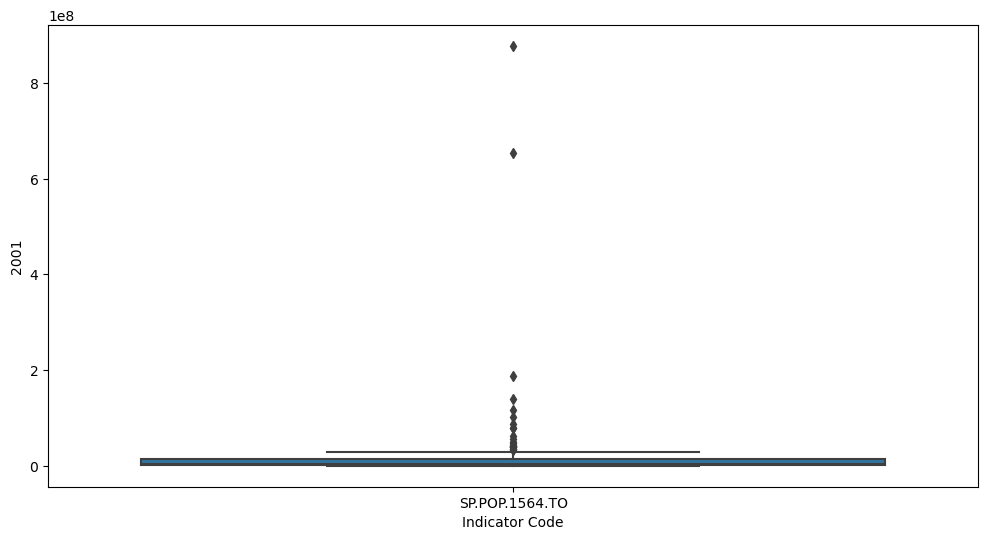

<IPython.core.display.Javascript object>

In [367]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Indicator Code", y=str(2001), data=distrib)

Il est possible d'observer cette distribution à travers d'un histogramme afin d'avoir un deuxième point de vue.

<Axes: xlabel='2001', ylabel='Count'>

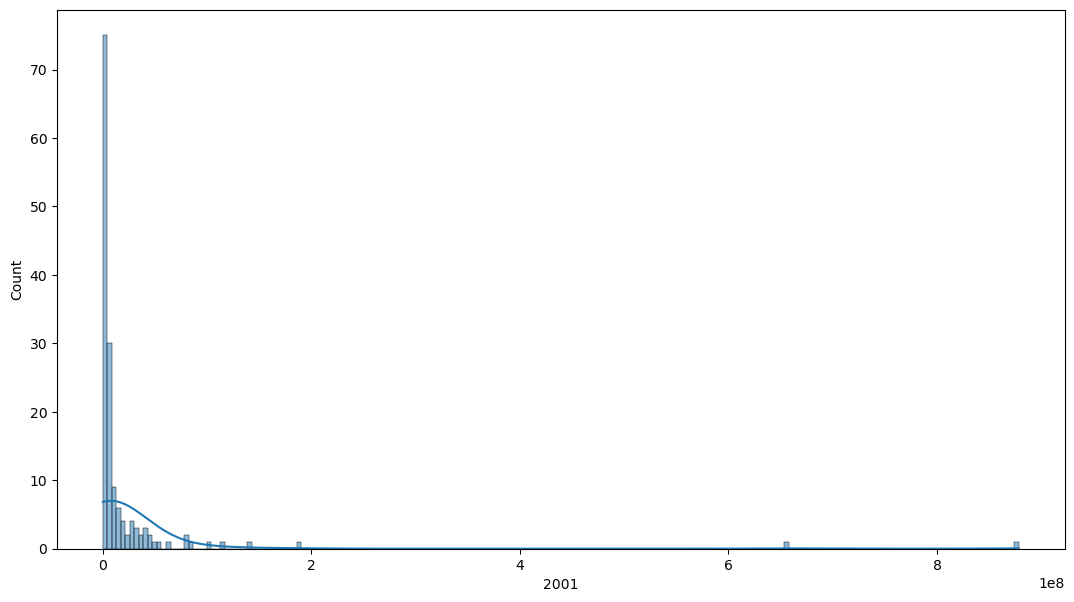

<IPython.core.display.Javascript object>

In [368]:
plt.figure(figsize=(13, 7))
sns.histplot(data=distrib, x=str(2001), kde=True)

In [369]:
# création d'une fonction distribution
def distribution(indic, annee):
    distrib = EdStatsData2.loc[
        EdStatsData2["Indicator Code"] == indic, ["Indicator Code", str(annee)]
    ]
    fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(18, 6))

    # Graphique 1

    sns.boxplot(x="Indicator Code", y=str(annee), data=distrib, ax=ax11)

    mean = distrib[str(annee)].mean()  # la moyenne
    std = distrib[str(annee)].std()  # l'ecart-type

    ax11.set_title(
        f"moy={round(mean, 2)}, std = {round(std, 2)}"
    )  # sous titre du graphe 1
    ax11.grid()

    # Graphique 2

    sns.histplot(data=distrib, x=str(annee), kde=True, ax=ax12)  # tracer graphe 2

    skewness = distrib[str(annee)].skew()  # l'assymétrie

    ax12.set_title(f"coef_applat={round(skewness, 2)}")  # sous titre du graphe 2

    # Pour les  2 graphes esthétique

    for s in ["top", "bottom", "left", "right"]:
        ax11.spines[s].set_visible(False)  # supprimer les bordures pour graphe 1
        ax12.spines[s].set_visible(False)  # supprimer les bordures pour graphe 2

    fig.suptitle(f"Distribution de {indic} en {annee}")  # titre commun des graphes

<IPython.core.display.Javascript object>

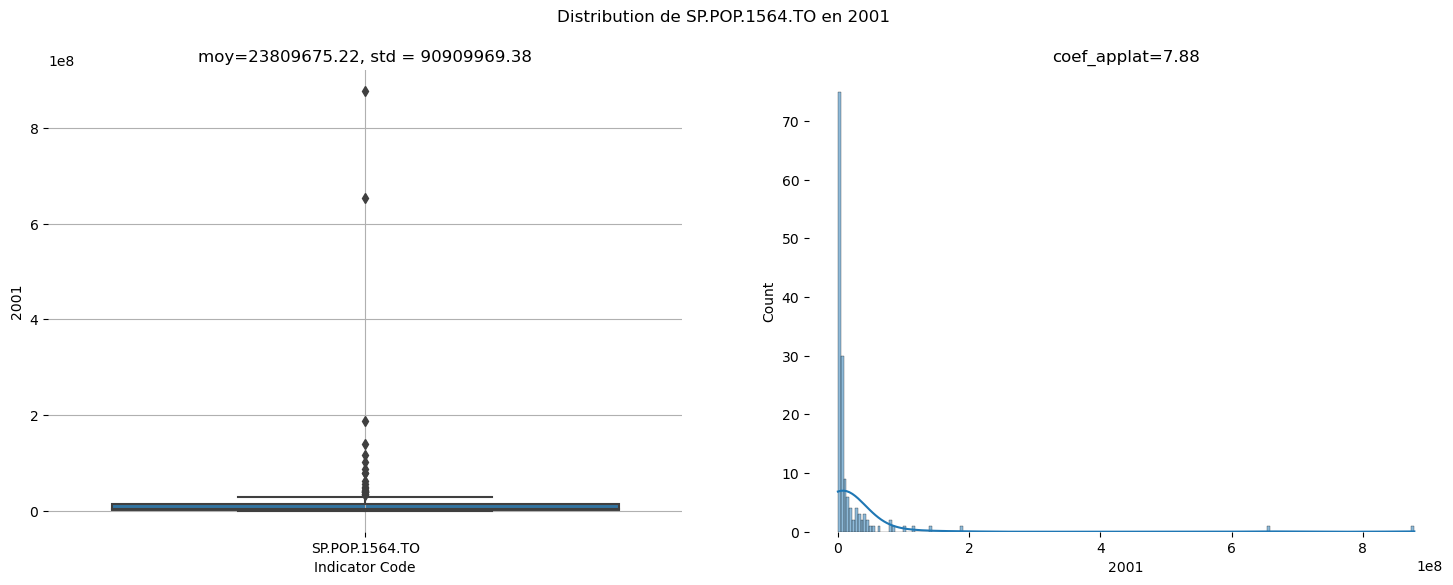

<IPython.core.display.Javascript object>

In [370]:
distribution(
    "SP.POP.1564.TO", "2001"
)  # la distribution pour le nbr population entre 15 et 64 ans en 2010

In [371]:
# avec le module interact nous pouvons sélectionner un indicateur et une date
interact(distribution, indic=indicateurs_retenus, annee=colnum)

interactive(children=(Dropdown(description='indic', options=('SP.POP.1564.TO', 'SP.POP.1014.TO.UN', 'SE.TER.EN…

<function __main__.distribution(indic, annee)>

<IPython.core.display.Javascript object>

## 4.5 Evolution d'un indicateur dans un pays choisis dans le temps

Maintenant nous avons analysé la distribution de chaque indicateur dans une année. Nous allons nous intéresser à l'évolution d'un indicateur dans le temps pour un pays choisi.

In [372]:
# Création de nos clés pour un dictionnaire. Ainsi l'indicateur sera une clé du dictionnaire
for key in indicateurs_retenus:
    print(key)

SP.POP.1564.TO
SP.POP.1014.TO.UN
SE.TER.ENRL
SE.SEC.ENRR
IT.CMP.PCMP.P2
IT.NET.USER.P2
NY.GNP.PCAP.PP.CD
UIS.XGDP.56.FSGOV


<IPython.core.display.Javascript object>

In [373]:
# création d'un dictionnaire
indicators_dict = {}
for key in indicateurs_retenus:
    # Création d'un sous dataframe de EdStatsData2  correspondant uniquement du l'indicateur choisi
    df = EdStatsData2.loc[EdStatsData2["Indicator Code"] == key]
    indicators_dict[key] = df  # affectation de la valeur du dictionnaire

<IPython.core.display.Javascript object>

### 4.5.1 Pour un indicateur et tous les pays

Pour l'indicateur 'SP.POP.1564.TO' avec *indicators_dict* nous aurons le sous dataframe suivant :

In [374]:
indicators_dict["SP.POP.1564.TO"]  # le dictionnaire avec la clé 'SP.POP.1564.TO'

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
97776,Albania,ALB,"Population, ages 15-64, total",SP.POP.1564.TO,1150954.0,1187511.0,1225713.0,1263871.0,1303917.0,1347151.0,...,1958838.0,1954566.0,1950306.0,1947666.0,1961611.0,1975480.0,1987352.0,1996460.0,2000257.0,1997271.0
101441,Algeria,DZA,"Population, ages 15-64, total",SP.POP.1564.TO,7220494.0,7422071.0,7623386.0,7830328.0,8053886.0,8300027.0,...,22965441.0,23433829.0,23883916.0,24315242.0,24691566.0,25080157.0,25457105.0,25800849.0,26106760.0,26383347.0
112436,Angola,AGO,"Population, ages 15-64, total",SP.POP.1564.TO,3463343.0,3533231.0,3611904.0,3698476.0,3793857.0,3898273.0,...,10560352.0,10942997.0,11346290.0,11771088.0,12188515.0,12635901.0,13107343.0,13596360.0,14100537.0,14605793.0
116101,Antigua and Barbuda,ATG,"Population, ages 15-64, total",SP.POP.1564.TO,36738.0,37527.0,38329.0,39128.0,39897.0,40636.0,...,59847.0,60900.0,62011.0,63172.0,64292.0,65460.0,66630.0,67755.0,68805.0,69717.0
119766,Argentina,ARG,"Population, ages 15-64, total",SP.POP.1564.TO,15267473.0,15503981.0,15750569.0,16000445.0,16243421.0,16471550.0,...,25288050.0,25624337.0,25953592.0,26268474.0,26575746.0,26869103.0,27153851.0,27440753.0,27734296.0,28009966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860096,Vanuatu,VUT,"Population, ages 15-64, total",SP.POP.1564.TO,44178.0,45575.0,47081.0,48665.0,50309.0,52011.0,...,127100.0,130250.0,133335.0,136701.0,140192.0,144369.0,148808.0,153019.0,156839.0,161124.0
863761,"Venezuela, RB",VEN,"Population, ages 15-64, total",SP.POP.1564.TO,5922931.0,6137625.0,6356688.0,6584883.0,6828328.0,7089172.0,...,17727023.0,18090057.0,18446608.0,18796235.0,19133607.0,19463631.0,19787207.0,20106367.0,20422290.0,20731567.0
867426,Vietnam,VNM,"Population, ages 15-64, total",SP.POP.1564.TO,21721088.0,22310702.0,22960978.0,23664557.0,24412641.0,25197830.0,...,57086960.0,58381777.0,59590863.0,60653977.0,61570095.0,62391546.0,63103325.0,63747992.0,64347640.0,64889971.0
882086,Zambia,ZMB,"Population, ages 15-64, total",SP.POP.1564.TO,2093057.0,2157454.0,2226702.0,2300839.0,2380241.0,2464895.0,...,6412074.0,6598805.0,6800199.0,7017292.0,7262395.0,7522657.0,7798003.0,8088061.0,8391596.0,8696624.0


<IPython.core.display.Javascript object>

On peut voir que grâce au dictionnaire indicators_dict[\_], nous avons bien un sous dataframe de EdStatsData2. 
Ainsi avec notre exemple, nous avons l'évolution de notre indicateur 'SP.POP.1564.TO' en fonction du temps pour chaque pays.                                                                                                                       

In [375]:
# descritif du sous data avec des valeur numériques arrondie au centième près
descriptif = round(indicators_dict["SP.POP.1564.TO"].describe(), 2).T
descriptif

,count,mean,std,min,25%,50%,75%,max
1970,152.0,12910838.74,4.671433e+07,27023.0,852011.75,2370100.5,6791405.25,457286083.0
1971,152.0,13183573.15,4.787543e+07,27806.0,886226.00,2434805.0,6898133.50,469451227.0
1972,152.0,13458686.16,4.899543e+07,28725.0,900779.25,2474888.5,7007760.50,480681273.0
1973,152.0,13736436.32,5.011204e+07,29419.0,913580.25,2521116.0,7077532.00,491635059.0
1974,152.0,14029988.30,5.127138e+07,30241.0,926434.50,2600902.0,7130292.25,502809795.0
1975,152.0,14333517.62,5.247413e+07,31283.0,939529.50,2684326.0,7181791.75,514296415.0
1976,152.0,14619152.32,5.368611e+07,32158.0,954917.75,2759508.5,7423110.75,526697859.0
1977,152.0,14922279.02,5.496282e+07,33121.0,979653.75,2811852.0,7674122.50,539548796.0
1978,152.0,15246747.66,5.635042e+07,33615.0,1005419.75,2858516.5,7912195.00,553710024.0
1979,152.0,15591230.74,5.783154e+07,34214.0,1031705.75,2922467.5,8112800.75,569051274.0


<IPython.core.display.Javascript object>

La moyenne en de la population entre 15 et 64ans ne cesse d'augmenter au cours du temps 

### 4.5.2 Pour un  indicateurs et pour un ou plusieurs pays de notre choix

In [376]:
def tendance(ind, pays):
    df = indicators_dict[
        ind
    ]  # dictionniare précédent (sous dataframe de EdStatsData2 )

    df = df.loc[df["Country Name"].isin(pays)]
    df = df.melt(id_vars="Country Name", value_vars=colnum, var_name="annee")

    # graphique
    plt.figure(figsize=(13, 7))
    sns.lineplot(
        x="annee",
        y="value",
        hue="Country Name",
        style="Country Name",  # trace du graphe
        markers=True,
        dashes=False,
        data=df,
    )
    plt.xticks(rotation=90)  # le noms des axes des abscisses sont à la verticale

    plt.legend(
        bbox_to_anchor=(1.01, 1), borderaxespad=0
    )  # placer la legend à l'exterieur du graphe
    plt.title(f'Évolution de {ind} pour le(s) pays {", ".join(pays)}', fontsize=18)
    plt.xlabel("\n \n Année", fontsize=15)
    plt.ylabel("\n \n nombre de personnes \n", fontsize=15)
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>

In [377]:
# création de la partie interactif du graphe
pays = widgets.SelectMultiple(
    options=EdStatsData2["Country Name"].unique(), disabled=False
)


date_range = widgets.IntRangeSlider(
    value=[2000, 2015],
    min=1970,
    max=2100,
    step=1,
    description="Year:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

<IPython.core.display.Javascript object>

In [378]:
# le graphe interactif
interact(tendance, ind=indicateurs_retenus, pays=pays)

interactive(children=(Dropdown(description='ind', options=('SP.POP.1564.TO', 'SP.POP.1014.TO.UN', 'SE.TER.ENRL…

<function __main__.tendance(ind, pays)>

<IPython.core.display.Javascript object>

# 5. Système de scoring

Nous allons créer un système de calcul de points avec notre propre barême afin de réaliser un classement des meilleurs pays potentiels pour notre école numérique.

In [379]:
indicators_dict.keys()

dict_keys(['SP.POP.1564.TO', 'SP.POP.1014.TO.UN', 'SE.TER.ENRL', 'SE.SEC.ENRR', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'UIS.XGDP.56.FSGOV'])

<IPython.core.display.Javascript object>

## 5.1 Calcul du score

In [380]:
# fonction indiquant si la dernière valeur est nulle ou non
def last_non_na_value(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]

<IPython.core.display.Javascript object>

In [381]:
colnum  # colonne numérique

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

<IPython.core.display.Javascript object>

In [382]:
indicators_dict.keys()

dict_keys(['SP.POP.1564.TO', 'SP.POP.1014.TO.UN', 'SE.TER.ENRL', 'SE.SEC.ENRR', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'UIS.XGDP.56.FSGOV'])

<IPython.core.display.Javascript object>

Notre système de points sera basé sur les quartiles et l'importance de notre indicateur pour notre étude. 
                                                                                                                           
                                                                                                                                                                                                                                                     -Le public actuel est le plus important donc les indicateurs sur la population de 15 à 64 ans et sur le niveau éducatif  rapporteront le plus de points.
                                                                                                                           -Les indicateurs internet et l'ordinateur rapporteront aussi beaucoup de points car ces outils sont indispensable afin de suivre des cours en ligne. Mais ils sont des indicateurs moins pesant par rapport aux précedents donc ils rapporterons moins points.  
                                                                                                                               La parité du PIB et le financement publique dans l'éducation permettent de savoir s'ils seront capable de financer facilement notre école numérique donc ils rapporteront autant de points que ceux sur les outils.     
                                                                                                                               La population de 10 à 14 ans ne visant pas directement le public actuel rapportera le moins de points.
                                                                                                                           

In [383]:
# les points n'ont pas de valeurs précise, ils permettent de mesurer plus ou moins le poids de l'indicateur dans notre étude
indicators_score_dict = {
    "SP.POP.1564.TO": {"points": [1, 5, 20, 45, 100, 200]},
    "SP.POP.1014.TO.UN": {"points": [1, 5, 5, 20, 30, 40]},
    "SE.TER.ENRL": {"points": [1, 5, 10, 45, 100, 200]},
    "SE.SEC.ENRR": {"points": [1, 5, 10, 45, 100, 200]},
    "IT.CMP.PCMP.P2": {"points": [1, 10, 25, 35, 65, 150]},
    "IT.NET.USER.P2": {"points": [1, 10, 20, 35, 65, 150]},
    "NY.GNP.PCAP.PP.CD": {"points": [1, 15, 25, 35, 65, 150]},
    "UIS.XGDP.56.FSGOV": {"points": [1, 15, 25, 35, 65, 150]},
}

<IPython.core.display.Javascript object>

In [384]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [385]:
# Complète le dictionnaire avec les quartiles de chaque indicateurs
for key in indicators_dict.keys():
    # Création d'une nouvelle colonne (recent_value), dernière valeurs renseignées
    indicators_dict[key]["recent_value"] = indicators_dict[key][colnum].apply(
        last_non_na_value, 1
    )
    Q1 = np.percentile(indicators_dict[key]["recent_value"], 25)
    Q2 = np.percentile(indicators_dict[key]["recent_value"], 50)
    Q3 = np.percentile(indicators_dict[key]["recent_value"], 75)

    # Ajouter dans le dictionnaires des points
    indicators_score_dict[key]["Q1"] = Q1
    indicators_score_dict[key]["Q2"] = Q2
    indicators_score_dict[key]["Q3"] = Q3

<IPython.core.display.Javascript object>

In [386]:
indicators_dict["UIS.XGDP.56.FSGOV"].head(4)  # vérfier la colonne recent_value

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,recent_value
96556,Albania,ALB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.77585,NaN,NaN,NaN,0.77585
100221,Algeria,DZA,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,1.16981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16981
111216,Angola,AGO,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19851
114881,Antigua and Barbuda,ATG,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.18783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18783


<IPython.core.display.Javascript object>

In [387]:
pprint(indicators_score_dict)  # imprime de manière plus propre et organisée que print

{'IT.CMP.PCMP.P2': {'Q1': 1.98254028891017,
                    'Q2': 7.829151925577275,
                    'Q3': 22.993468803812128,
                    'points': [1, 10, 25, 35, 65, 150]},
 'IT.NET.USER.P2': {'Q1': 25.2747254425,
                    'Q2': 53.213089055,
                    'Q3': 74.53248417,
                    'points': [1, 10, 20, 35, 65, 150]},
 'NY.GNP.PCAP.PP.CD': {'Q1': 4347.5,
                       'Q2': 12285.0,
                       'Q3': 26915.0,
                       'points': [1, 15, 25, 35, 65, 150]},
 'SE.SEC.ENRR': {'Q1': 61.012267112731976,
                 'Q2': 88.91774368286136,
                 'Q3': 102.481300354004,
                 'points': [1, 5, 10, 45, 100, 200]},
 'SE.TER.ENRL': {'Q1': 43924.0,
                 'Q2': 196661.5,
                 'Q3': 608936.0,
                 'points': [1, 5, 10, 45, 100, 200]},
 'SP.POP.1014.TO.UN': {'Q1': 235265.5,
                       'Q2': 689842.5,
                       'Q3': 2650979.0,
        

<IPython.core.display.Javascript object>

Afin de calculer notre score et éviter de le faire manuellement pour chacun des pays nous devons créer une fonction que nous appellerons attribute_scores(x, key): 

In [388]:
def attribute_scores(x, key):
    # Récupère les valeurs dans notre dictionnaire de points
    points = indicators_score_dict[key]["points"]
    Q1 = indicators_score_dict[key]["Q1"]
    Q2 = indicators_score_dict[key]["Q2"]
    Q3 = indicators_score_dict[key]["Q3"]
    max_without_outliers = Q3 + 1.5 * (Q3 - Q1)
    min_without_outliers = Q1 - 1.5 * (Q3 - Q1)

    # Attribution des points en fonction des quartiles
    if x < min_without_outliers:
        return points[0]
    elif x < Q1:
        return points[1]
    elif x < Q2:
        return points[2]
    elif x < Q3:
        return points[3]
    elif x < max_without_outliers:
        return points[4]
    else:
        return points[5]

<IPython.core.display.Javascript object>

In [389]:
# l'ajout de score dans le dictionnaire
for key in indicators_dict.keys():
    indicators_dict[key]["score"] = indicators_dict[key]["recent_value"].apply(
        attribute_scores, key=key
    )

<IPython.core.display.Javascript object>

In [390]:
# pour l'indicateur 'UIS.XGDP.56.FSGOV'
indicators_dict["UIS.XGDP.56.FSGOV"].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,recent_value,score
96556,Albania,ALB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.77585,NaN,NaN,NaN,0.77585,25
100221,Algeria,DZA,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16981,35
111216,Angola,AGO,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19851,15
114881,Antigua and Barbuda,ATG,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.18783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18783,15
118546,Argentina,ARG,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92179,0.91474,0.96898,1.01678,1.08136,NaN,NaN,NaN,1.08136,35


<IPython.core.display.Javascript object>

## 5.2 Résultats

### 5.2.3 Résultats du scoring pour tous les indicateurs 

In [391]:
# Concatener les dataframes
scored_data = pd.concat([indicators_dict[key] for key in indicators_dict.keys()])
print(scored_data.shape)
scored_data.sample(10)

(1216, 53)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,recent_value,score
778184,Sweden,SWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,141218.0,141367.0,133168.0,131614.0,128879.0,...,4.225800e+05,4.550250e+05,4.635300e+05,4.533280e+05,4.366030e+05,4.294440e+05,428557.0,NaN,4.285570e+05,45
792844,Tanzania,TZA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2027.0,2220.0,2683.0,3000.0,3424.0,3064.0,...,NaN,8.511300e+04,NaN,1.660140e+05,1.582620e+05,NaN,NaN,NaN,1.582620e+05,10
453220,Jordan,JOR,"Population, ages 10-14, total",SP.POP.1014.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.102430e+05,7.207920e+05,7.243250e+05,7.219320e+05,7.165510e+05,7.124210e+05,712515.0,NaN,7.125150e+05,20
188181,Brazil,BRA,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,8.748300e-01,9.260700e-01,9.621400e-01,9.678800e-01,NaN,NaN,NaN,NaN,9.678800e-01,35
675564,Romania,ROU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,151885.0,148428.0,143985.0,143656.0,152728.0,...,1.098188e+06,9.995230e+05,8.718420e+05,7.053330e+05,6.181570e+05,5.787060e+05,541653.0,NaN,5.416530e+05,45
400751,Honduras,HND,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.897500e-01,NaN,9.742900e-01,1.086250e+00,9.853400e-01,NaN,NaN,9.853400e-01,35
862527,"Venezuela, RB",VEN,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.637000e+04,1.601000e+04,1.655000e+04,1.753000e+04,1.770000e+04,1.744000e+04,NaN,NaN,1.744000e+04,35
602312,Netherlands,NLD,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.413000e+04,4.495000e+04,4.691000e+04,4.767000e+04,4.935000e+04,4.888000e+04,49770.0,50710.0,5.071000e+04,65
684115,Rwanda,RWA,"Population, ages 10-14, total",SP.POP.1014.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.200644e+06,1.220245e+06,1.244738e+06,1.275653e+06,1.313306e+06,1.358102e+06,1409946.0,NaN,1.409946e+06,20
618206,Niger,NER,"Population, ages 15-64, total",SP.POP.1564.TO,2237132.0,2295030.0,2357959.0,2425972.0,2499234.0,2578222.0,...,7.536686e+06,7.813179e+06,8.090920e+06,8.390166e+06,8.709187e+06,9.046469e+06,9402408.0,9761597.0,9.761597e+06,45


<IPython.core.display.Javascript object>

Il serait intéressant de compléter notre tableau 'scored_data' avec des informations sur la région et la catégorie de revenus d'un pays. Pour cela nous allons créer une table comportant le 'country code', la 'région' et 'income group' provenant de notre data EdStatsCountry. Puis nous ajouterons cette table à scored_data

In [392]:
# table du code du pays, de sa région et sa catégorie de revenu
EdStatsCountry[["Country Code", "Region", "Income Group"]]

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


<IPython.core.display.Javascript object>

In [393]:
# ajout des regions et l'income group à scored_data
scored_data = scored_data.merge(
    EdStatsCountry[["Country Code", "Region", "Income Group"]],
    how="left",
    on="Country Code",
)
scored_data.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2011,2012,2013,2014,2015,2016,recent_value,score,Region,Income Group
0,Albania,ALB,"Population, ages 15-64, total",SP.POP.1564.TO,1150954.0,1187511.0,1225713.0,1263871.0,1303917.0,1347151.0,...,1961611.0,1975480.0,1987352.0,1996460.0,2000257.0,1997271.0,1997271.0,20,Europe & Central Asia,Upper middle income
1,Algeria,DZA,"Population, ages 15-64, total",SP.POP.1564.TO,7220494.0,7422071.0,7623386.0,7830328.0,8053886.0,8300027.0,...,24691566.0,25080157.0,25457105.0,25800849.0,26106760.0,26383347.0,26383347.0,100,Middle East & North Africa,Upper middle income
2,Angola,AGO,"Population, ages 15-64, total",SP.POP.1564.TO,3463343.0,3533231.0,3611904.0,3698476.0,3793857.0,3898273.0,...,12188515.0,12635901.0,13107343.0,13596360.0,14100537.0,14605793.0,14605793.0,45,Sub-Saharan Africa,Upper middle income
3,Antigua and Barbuda,ATG,"Population, ages 15-64, total",SP.POP.1564.TO,36738.0,37527.0,38329.0,39128.0,39897.0,40636.0,...,64292.0,65460.0,66630.0,67755.0,68805.0,69717.0,69717.0,5,Latin America & Caribbean,High income: nonOECD
4,Argentina,ARG,"Population, ages 15-64, total",SP.POP.1564.TO,15267473.0,15503981.0,15750569.0,16000445.0,16243421.0,16471550.0,...,26575746.0,26869103.0,27153851.0,27440753.0,27734296.0,28009966.0,28009966.0,100,Latin America & Caribbean,Upper middle income
5,Armenia,ARM,"Population, ages 15-64, total",SP.POP.1564.TO,1391442.0,1452693.0,1513213.0,1573533.0,1634960.0,1697733.0,...,2004467.0,2009342.0,2014206.0,2017975.0,2019877.0,2018577.0,2018577.0,20,Europe & Central Asia,Lower middle income
6,Australia,AUS,"Population, ages 15-64, total",SP.POP.1564.TO,7833749.0,8126132.0,8300916.0,8455081.0,8703987.0,8851601.0,...,15029738.0,15233953.0,15435139.0,15598904.0,15745617.0,15887445.0,15887445.0,45,East Asia & Pacific,High income: OECD
7,Austria,AUT,"Population, ages 15-64, total",SP.POP.1564.TO,4588114.0,4597102.0,4623665.0,4659390.0,4685096.0,4696500.0,...,5657956.0,5677901.0,5703424.0,5736127.0,5787638.0,5849908.0,5849908.0,45,Europe & Central Asia,High income: OECD
8,Azerbaijan,AZE,"Population, ages 15-64, total",SP.POP.1564.TO,2641453.0,2725028.0,2809671.0,2898619.0,2996371.0,3104151.0,...,6565173.0,6663583.0,6745790.0,6818152.0,6884940.0,6929417.0,6929417.0,45,Europe & Central Asia,Upper middle income
9,Bangladesh,BGD,"Population, ages 15-64, total",SP.POP.1564.TO,34051413.0,34616781.0,35141530.0,35681139.0,36286641.0,36995593.0,...,97987374.0,99843589.0,101732877.0,103669903.0,105651107.0,107583339.0,107583339.0,200,South Asia,Low income


<IPython.core.display.Javascript object>

Nous avons bien rajouté la colonne région et income group à notre table scored_data

### 5.2.2 Top 30 des pays

In [394]:
# table avec le pays, Region et la catégorie de revenu en fonction de son score rangé dans l'orde décroissant
top_countries = (
    scored_data.groupby(["Country Name", "Region", "Income Group"])
    .agg({"score": np.sum})
    .sort_values(by="score", ascending=False)
    .reset_index()
)
top_countries.head(30)  # Affiche Table des 30 meilleurs score

,Country Name,Region,Income Group,score
0,Germany,Europe & Central Asia,High income: OECD,875
1,United States,North America,High income: OECD,830
2,France,Europe & Central Asia,High income: OECD,775
3,United Kingdom,Europe & Central Asia,High income: OECD,775
4,Saudi Arabia,Middle East & North Africa,High income: nonOECD,745
5,Russian Federation,Europe & Central Asia,High income: nonOECD,700
6,Japan,East Asia & Pacific,High income: OECD,695
7,"Korea, Rep.",East Asia & Pacific,High income: OECD,670
8,Canada,North America,High income: OECD,665
9,Turkey,Europe & Central Asia,Upper middle income,660


<IPython.core.display.Javascript object>

Le top 30 permet de nous indiquer les potentiels pays où on pourrait implanter notre école. Les pays ayant obtenue les meilleurs score sont l'Allemagne, suivi des États-Unis, de la France et du Royaume-Uni. De plus, la majorité des pays du top appartiennent à la catégorie de revenus supérieur ou moyen supérieur à l'exception du Vietnam, de l'Inde et des Philippines. Nous avons aucun pays d'Afrique Subsaharienne. 

Ce classement peut être critiqué par le rang de la Chine, 21ème du classement, qui est la première puissance démographique et la deuxième puissance économique mondiale. 

In [395]:
top_countries["score"].describe()  # informations statistiques de base

count    152.000000
mean     318.881579
std      196.082660
min       70.000000
25%      155.000000
50%      240.000000
75%      451.250000
max      875.000000
Name: score, dtype: float64

<IPython.core.display.Javascript object>

La moyenne du score est de 318 points. De plus nous pouvons observer que les pays potentiel appartenant au quartile supérieur (75%) ont un score supérieur à 451 points 

## 5.3 Répartition des régions et des revenus des premiers pays

### 5.3.1 Les Régions

Il serait intéressent de visualier cette table graphiquement. Nous allons ainsi réaliser un graphique interactif permettant de choisir l'intervalle de valeur du score et la région que nous voulons étudier. 

In [396]:
def countries_score(score_range, region=None):
    # prendre en compte uniquement les pays étant dans l'intervalle de score choisi
    df = top_countries.loc[
        (top_countries["score"] > min(score_range))
        & (top_countries["score"] < max(score_range))
    ]
    if region:
        df = df.loc[
            df["Region"] == region
        ]  # affiche les pays appartenant à la région sélectionnée

    if df.shape[0] == 0:
        print("Aucun pays sélectionné dans la region ", region)

    else:
        plt.figure(figsize=(13, 8))
        sns.barplot(y="Country Name", x="score", data=df)  # trace le graphe
        ax = plt.gca()

        # Supprimer les bordure des axes
        for s in ["top", "bottom", "left", "right"]:
            ax.spines[s].set_visible(False)

        # Remove x, y Ticks

        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")

        # mettre les valeurs au bout de la bar du graphe
        for i in ax.patches:
            ax.text(
                i.get_width() + 0.05,
                i.get_y() + 0.5,
                str(round((i.get_width()), 2)),
                fontsize=10,
                fontweight="bold",
                color="grey",
            )
        plt.grid()
        plt.title(f"{region}")
        plt.show()

<IPython.core.display.Javascript object>

In [397]:
regions = list(top_countries["Region"].unique())  # liste de nos régions
regions

['Europe & Central Asia',
 'North America',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'Latin America & Caribbean',
 'South Asia',
 'Sub-Saharan Africa']

<IPython.core.display.Javascript object>

In [398]:
regions.append(None)  # rajouter la valeur None à la liste
regions

['Europe & Central Asia',
 'North America',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'Latin America & Caribbean',
 'South Asia',
 'Sub-Saharan Africa',
 None]

<IPython.core.display.Javascript object>

In [399]:
# permet d'interagir avec notre graphe directement
score_range = widgets.IntRangeSlider(
    value=[500, 880],
    min=50,  # valeur minimumn de score
    max=880,  # valeur maximun de score
    step=1,  # le pas
    description="Score:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",  # l'oreintation de la barre d'interactive
    readout=True,
)

<IPython.core.display.Javascript object>

In [400]:
interact(countries_score, score_range=score_range, region=regions)

interactive(children=(IntRangeSlider(value=(500, 880), continuous_update=False, description='Score:', max=880,…

<function __main__.countries_score(score_range, region=None)>

<IPython.core.display.Javascript object>

### 5.3.2 Répartition des régions et des revenus des premiers pays

Par curirosité nous pouvons établir un graphe sur le nombre de pays par région ou catégorie de revenu appartenant à un intervalle de score choisis.

In [401]:
def donutbar(score_range, var):
    df = top_countries.loc[
        (top_countries["score"] > min(score_range))
        & (top_countries["score"] < max(score_range))
    ]

    df = df[var].value_counts().sort_values(ascending=False)  # Dans l'orde décroissant

    # GRAPHE 1 : bar

    fig, (ax11, ax12) = plt.subplots(
        1, 2, figsize=(12, 4.5)
    )  # superposition de 2 graphes
    ax11.barh(df.index, df.values, color="darkturquoise")  # tracer du graphe en bar

    ax11.xaxis.set_ticks_position("none")
    ax11.yaxis.set_ticks_position("none")

    ax11.set_title(f"\n Nombre de pays par {var} \n", fontsize=16)  # titre graphe 1
    ax11.grid()

    # Effacer les bords
    for s in ["top", "bottom", "left", "right"]:
        ax11.spines[s].set_visible(False)

    # Mettre les valeurs au bout de la bar du graphe
    ax11.invert_yaxis()
    for i in ax11.patches:
        ax11.text(
            i.get_width() + 0.2,
            i.get_y() + 0.5,
            str(round((i.get_width()), 2)),
            fontsize=10,
            fontweight="bold",
            color="black",
        )

    # GRAPHE 2 : camembert

    # palette de couleur bleu
    color_palette_list = [
        "#009ACD",
        "#ADD8E6",
        "#63D1F4",
        "#0EBFE9",
        "#C1F0F6",
        "#0099CC",
    ]

    ax12.pie(
        df.values, labels=df.index, autopct="%.0f%%", colors=color_palette_list
    )  # Trace le camembert
    centre_circle = plt.Circle(
        (0, 0), 0.70, fc="white"
    )  # le vide du centre du camembert
    ax12.add_artist(centre_circle)
    ax12.set_title(f"\n la répartion {var} en % \n", fontsize=16)  # titre du graphe
    plt.show()

<IPython.core.display.Javascript object>

In [402]:
vars = ["Region", "Income Group"]  # la variable étudiée

<IPython.core.display.Javascript object>

In [403]:
interact(donutbar, score_range=score_range, var=vars)

interactive(children=(IntRangeSlider(value=(500, 880), continuous_update=False, description='Score:', max=880,…

<function __main__.donutbar(score_range, var)>

<IPython.core.display.Javascript object>

L' Eurasie représente plus de 60% des pays ayant un haut score. Puis on s'apperçoit que l'Amérique du Nord représente que 6%, or ces 2 pays font partie du top 8 du classement.

Les pays ayant des revenus supérieur et supérieur moyenne représentent ensemble plus de 80% du top du classement.

# 6.  Conclusion

L'objectif de cette étude était de trouver les pays dans lesquels on souhaiterait implanter notre école numérique.

 Ainsi nous avons sélectionné des indicateurs pertinents et réalisé un système de scores basé sur les quartiles. Puis à partir de ce système nous avons réalisé un classement des pays étant les plus pertinents par ordre de priorité pour nous.

In [404]:
# table avec le pays, Region et la catégorie de revenu en fonction de son score rangé dans l'orde décroissant
top_countries = (
    scored_data.groupby(["Country Name", "Region", "Income Group"])
    .agg({"score": np.sum})
    .sort_values(by="score", ascending=False)
    .reset_index()
)
top_countries.head(10)  # Affiche Table des 30 meilleurs score

,Country Name,Region,Income Group,score
0,Germany,Europe & Central Asia,High income: OECD,875
1,United States,North America,High income: OECD,830
2,France,Europe & Central Asia,High income: OECD,775
3,United Kingdom,Europe & Central Asia,High income: OECD,775
4,Saudi Arabia,Middle East & North Africa,High income: nonOECD,745
5,Russian Federation,Europe & Central Asia,High income: nonOECD,700
6,Japan,East Asia & Pacific,High income: OECD,695
7,"Korea, Rep.",East Asia & Pacific,High income: OECD,670
8,Canada,North America,High income: OECD,665
9,Turkey,Europe & Central Asia,Upper middle income,660


<IPython.core.display.Javascript object>

Par conséquent à partir de notre classement les pays à prioriser sont l'Allemagne, les États Unis, la France et le
Royaume Uni.

Au niveau de la qualité de données les datas sont riches en information. Cependant la qualité de données est à nuancer. En effet, la présence de nombreuses valeurs nulle n'est pas négligable dans chaque jeu de donnée. Il est possible de complèter les données manquantes par l'imputation par la moyenne, la médiane ou KNN. Néanmoins ces méthodes d'imputation en vue de nos nombreuses valeurs manquantes pourraient réellement fausser notre analyse.

Notre système de scoring nous donne bien un classement des pays potentiels. Or nous pouvons remettre en cause ce système. En effet, il repose uniquement sur la dernière valeur non nulle ainsi il ne calcule pas le scoring pour une année précise. De surcroît la période économique n'est pas prise en compte par exemple la Guerre Froide fini 1989. Ensuite, il est étonnant que des pays comme la Chine avec un grande puissance économique et démographique ne soit pas le top 20.